# Exercício 1

In [1]:
seed = 1000

In [2]:
# 0 - Left
# 1 - Right
# 2 - Up
# 3 - Down

def state_transition(state, action):
    if action == 0:
        end_state = state - 1
    elif action == 1:
        end_state = state + 1
    elif action == 2:
        end_state = state - 10
    elif action == 3:
        end_state = state + 10
    else:
        return "Invalid syntax for action"

    if 100 >= end_state >= 1:
        return end_state
    else:
        return state

# Exercício 2

In [3]:
def reward(state):
    if state == 100:
        return 100
    else:
        return 0

# Exercício 3

In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [5]:

def search(iterations):
    accumulated_reward = 0
    avg_reward = 0
    state = 1
    for x in range(iterations):
        if state == 100:
            state = 1

        action = random.randint(0, 3)
        state = state_transition(state, action)
        rwd = reward(state)
        accumulated_reward = accumulated_reward + rwd
        
    if accumulated_reward > 0:
        avg_reward = iterations / accumulated_reward

    return accumulated_reward, avg_reward

Run: 1 For 1000 iterations - Accumulated reward:  100 Average reward:  10.0 Time: 0.001001119613647461
Run: 2 For 1000 iterations - Accumulated reward:  300 Average reward:  3.33 Time: 0.0010004043579101562
Run: 3 For 1000 iterations - Accumulated reward:  400 Average reward:  2.5 Time: 0.001001596450805664
Run: 4 For 1000 iterations - Accumulated reward:  200 Average reward:  5.0 Time: 0.0010004043579101562
Run: 5 For 1000 iterations - Accumulated reward:  200 Average reward:  5.0 Time: 0.0010008811950683594
Run: 6 For 1000 iterations - Accumulated reward:  200 Average reward:  5.0 Time: 0.0020017623901367188
Run: 7 For 1000 iterations - Accumulated reward:  300 Average reward:  3.33 Time: 0.0010008811950683594
Run: 8 For 1000 iterations - Accumulated reward:  100 Average reward:  10.0 Time: 0.0010013580322265625
Run: 9 For 1000 iterations - Accumulated reward:  400 Average reward:  2.5 Time: 0.0020029544830322266
Run: 10 For 1000 iterations - Accumulated reward:  200 Average reward: 

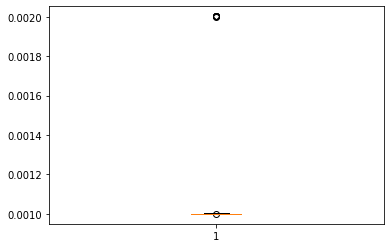

Run: 1 For 20000 iterations - Accumulated reward:  3900 Average reward:  5.13 Time: 0.024021625518798828
Run: 2 For 20000 iterations - Accumulated reward:  4900 Average reward:  4.08 Time: 0.023021221160888672
Run: 3 For 20000 iterations - Accumulated reward:  3700 Average reward:  5.41 Time: 0.023021221160888672
Run: 4 For 20000 iterations - Accumulated reward:  3900 Average reward:  5.13 Time: 0.02302074432373047
Run: 5 For 20000 iterations - Accumulated reward:  3900 Average reward:  5.13 Time: 0.02402210235595703
Run: 6 For 20000 iterations - Accumulated reward:  3900 Average reward:  5.13 Time: 0.02302074432373047
Run: 7 For 20000 iterations - Accumulated reward:  3900 Average reward:  5.13 Time: 0.023020505905151367
Run: 8 For 20000 iterations - Accumulated reward:  3300 Average reward:  6.06 Time: 0.02302098274230957
Run: 9 For 20000 iterations - Accumulated reward:  3700 Average reward:  5.41 Time: 0.023021221160888672
Run: 10 For 20000 iterations - Accumulated reward:  2600 Av

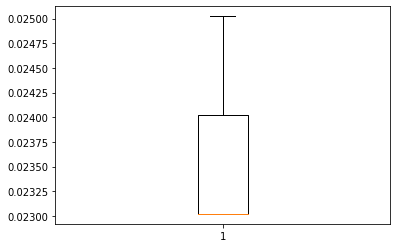

In [6]:
random.seed(seed)
itr = [1000, 20000]
for k in itr:
    runtimes = []
    for j in range(30):
        start_time = time.time()
        run = search(k)
        end_time = time.time() - start_time
        runtimes.append(end_time)
        print('Run:',j+1,'For', k, 'iterations - Accumulated reward: ', run[0], 'Average reward: ', round(run[1],2), 'Time:', end_time)
    print('Average run-times:',sum(runtimes)/30,'Standard deviation:', np.std(runtimes), 'Iterations:',k)
    plt.boxplot(runtimes)
    plt.show()

# Exercício 4

In [7]:
import seaborn as sns

In [29]:
# Escolhe o proximo estado, as verificacoes sao de modo ao agente nao sair do 'environment'
# Dos estados possiveis ve a utilidade dos mesmos e no caso de haver empate escolhe um aleatoriamente

def choose_state(state, vector):
    possible_states = []
    if state % 10 == 1:
        possible_states.append(state + 1)
    elif state % 10 == 0:
        possible_states.append(state - 1)
    else:
        possible_states.append(state - 1)
        possible_states.append(state + 1)
    if state - 10 > 0: possible_states.append(state - 10)
    if state + 10 <= 100: possible_states.append(state + 10)
    possible_states_utility = []
    for i in possible_states:
        possible_states_utility.append(vector[i - 1])
    m = max(possible_states_utility)
    max_idx = [i for i, j in enumerate(possible_states_utility) if j == m]
    chosen_state = random.choice(max_idx)
    return possible_states[chosen_state]

# Apos receber o proximo estado, calcula o reward e atualiza a utilidade do estado

def get_next_state(vector, state, alfa, discount):
    # V(s) = (1 - alfa) * V(s) + alfa * ( r(s) + discount * V(s') )

    next_state = choose_state(state, vector)
    step_reward = reward(state)
    if state == 100:
        vector[state - 1] = (1 - alfa) * vector[state - 1] + alfa * (step_reward + discount * 0)
        next_state = 1
    else:
        vector[state - 1] = (1 - alfa) * vector[state - 1] + alfa * (
                step_reward + discount * vector[next_state - 1])

    return next_state, vector


def epoch(iterations, alfa, discount):
    steps = [0, 19999]
    start_time = time.time()
    vector = [0 for i in range(100)]
    state = 1
    average_reward_lst = []
    for step in range(iterations):
        if step in steps:
            lst = []
            acc_reward = 0
            for j in range(1000):
                next_state = choose_state(state, vector)
                step_reward = reward(state)
                acc_reward = acc_reward + step_reward
                if state == 100:
                    state = 1
                else:
                    state = next_state
                average_reward = acc_reward / 1000
                lst.append(average_reward)
            average_reward_lst.append(lst)
        else:
            state, vector = get_next_state(vector, state, alfa, discount)

    end_time = time.time() - start_time
    arr = np.asmatrix(np.split(np.array(vector), 10))
    sns.heatmap(arr)
    plt.show()
    plt.boxplot([average_reward_lst[i] for i in range(len(average_reward_lst))])
    plt.show()
    return end_time

def search(nr_epochs, iterations, alfa, discount):
    runtimes = []
    for i in range(nr_epochs):
        runtimes.append(epoch(iterations, alfa, discount))
    print('Average run-times:', sum(runtimes) / nr_epochs, 'Standard deviation:', np.std(runtimes))

### Alfa 0.05 - Discount 0.99

Com um discount alto sinto que o agente rapidamente pode ficar preso sempre no mesmo caminho

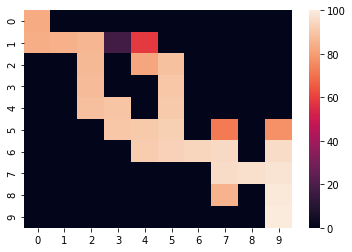

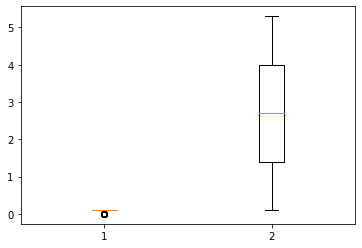

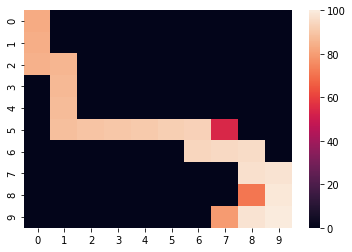

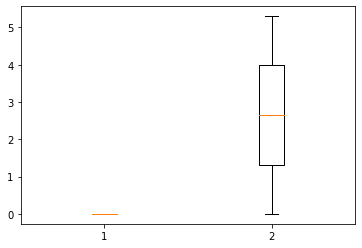

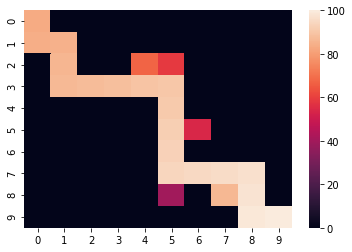

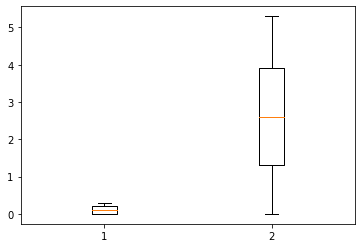

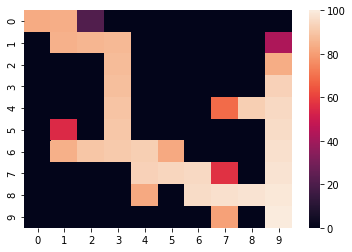

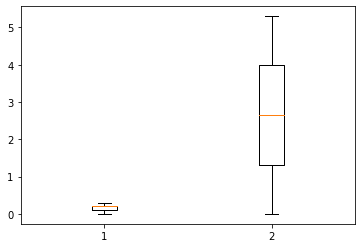

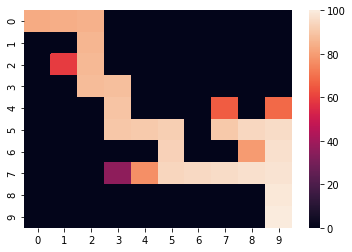

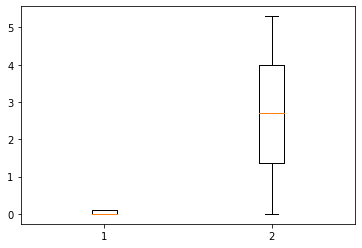

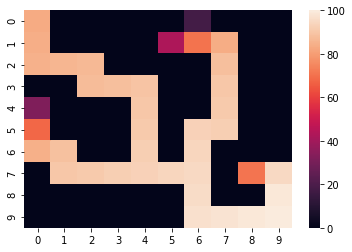

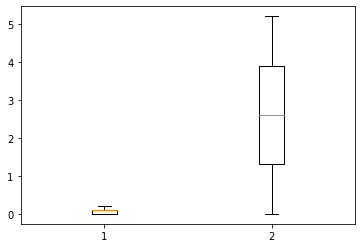

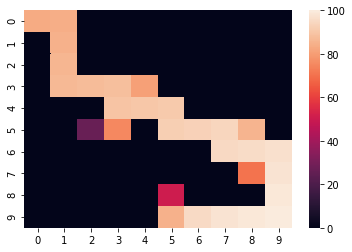

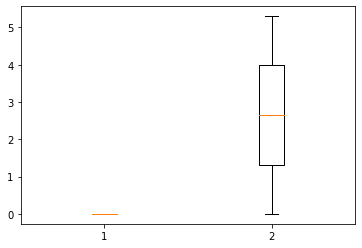

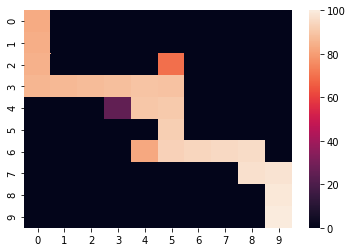

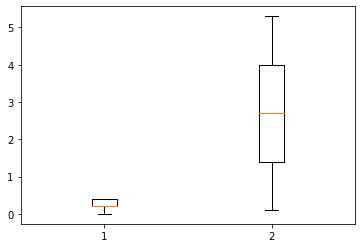

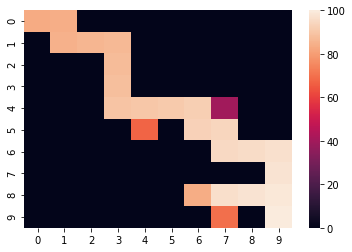

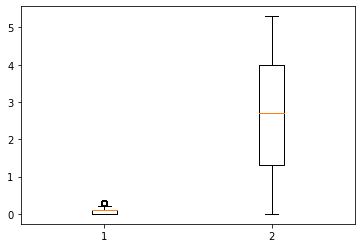

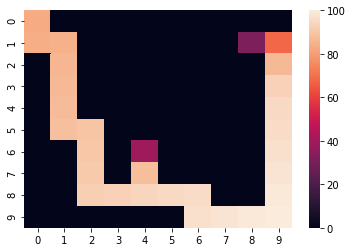

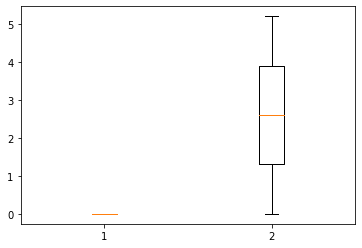

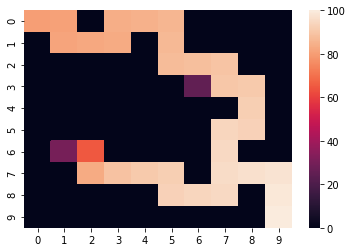

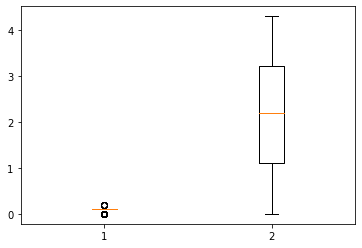

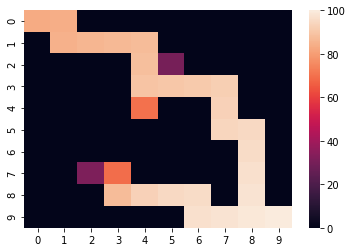

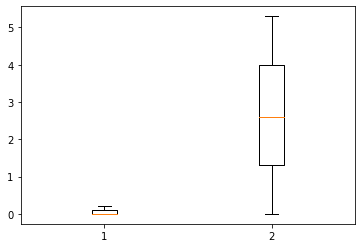

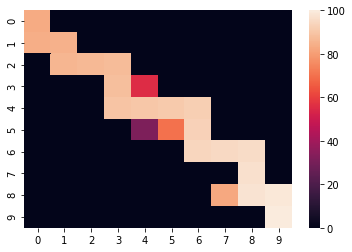

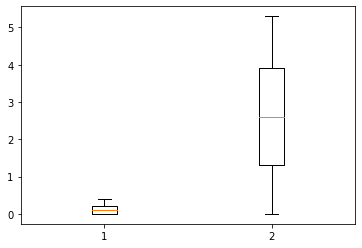

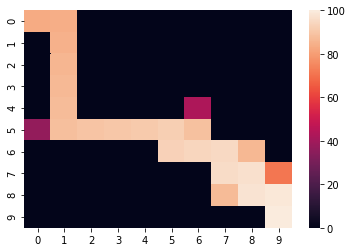

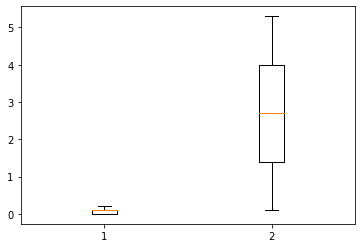

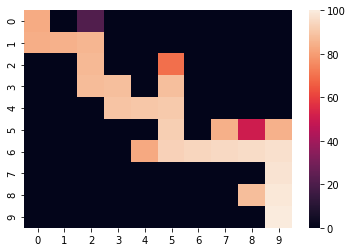

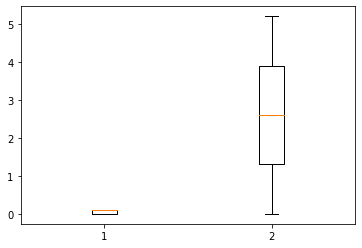

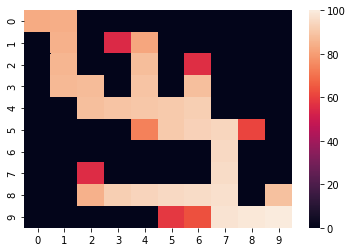

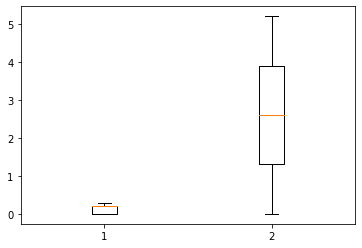

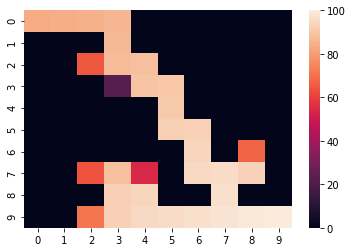

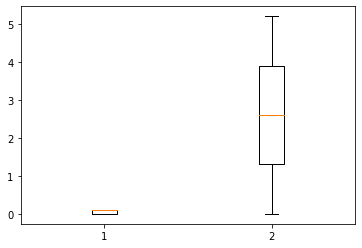

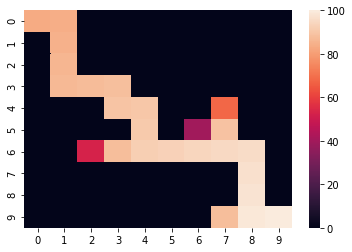

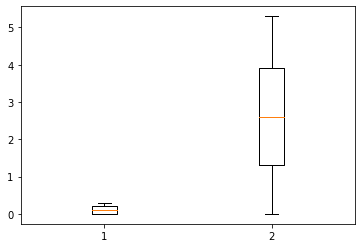

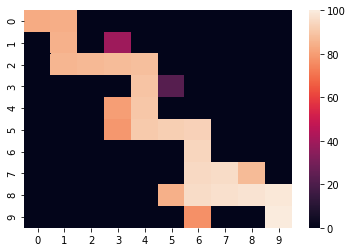

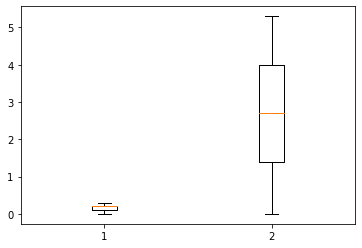

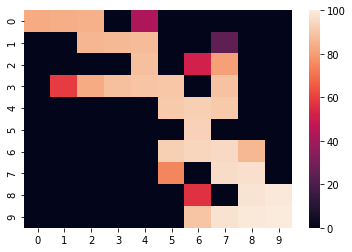

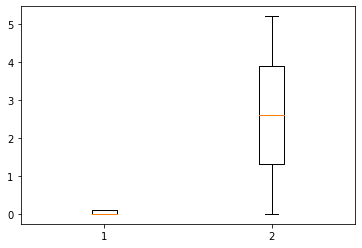

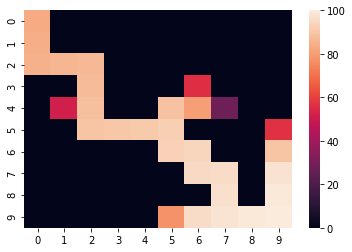

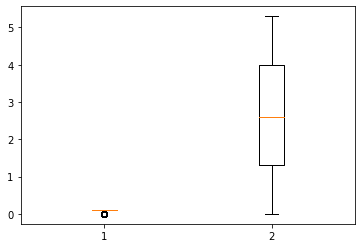

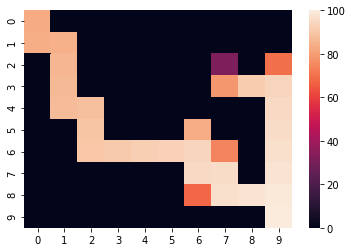

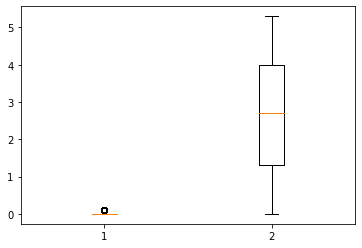

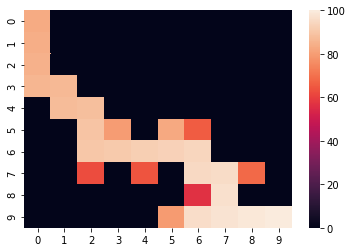

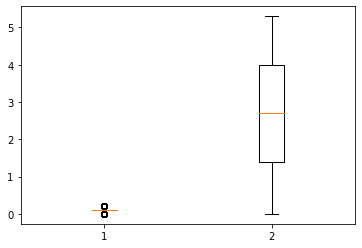

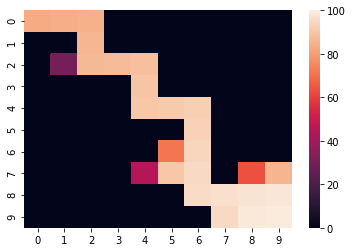

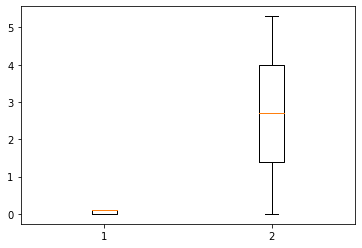

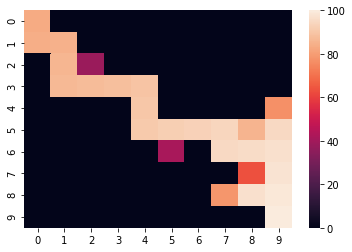

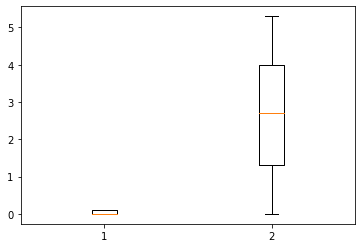

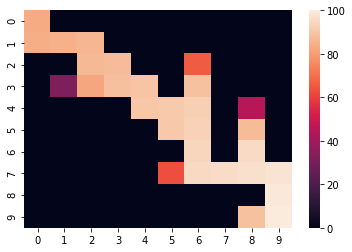

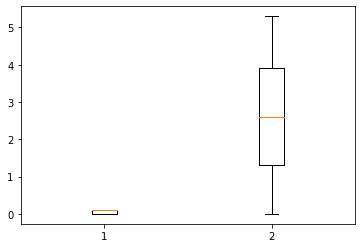

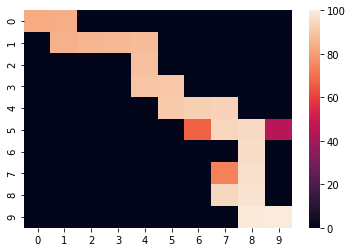

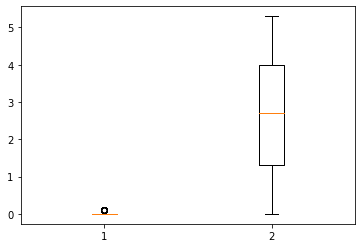

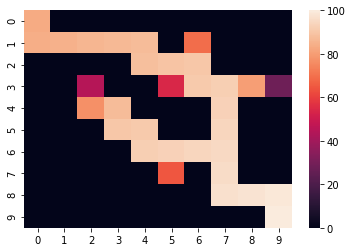

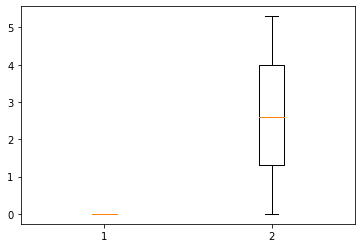

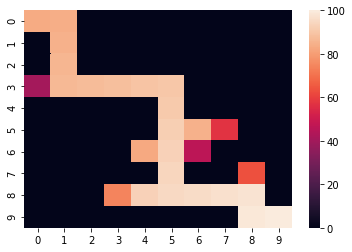

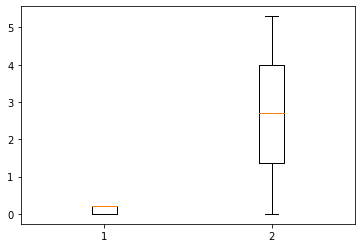

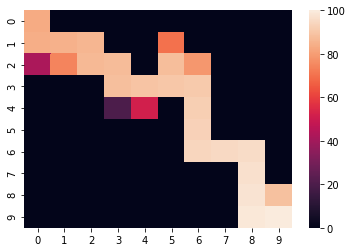

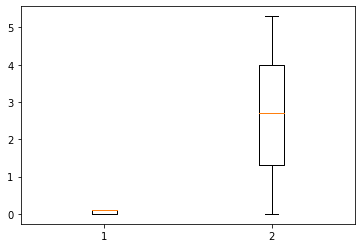

Average run-times: 0.05885435740152995 Standard deviation: 0.0007914291761517


In [9]:
random.seed(seed)
search(30,20000, 0.9, 0.99)

### Alfa 0.05 - Discount 0.7

Um discount menor faz com que o caminho inicial não importe tanto, o que significa que o agente pode vir a descobrir caminhos mais eficientes.

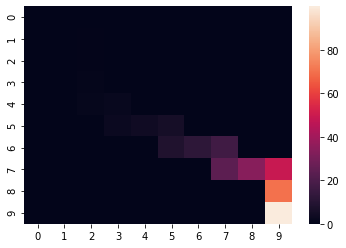

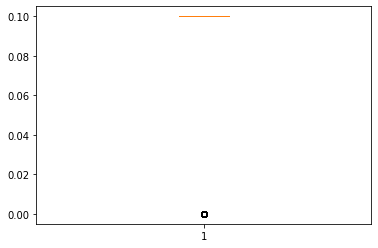

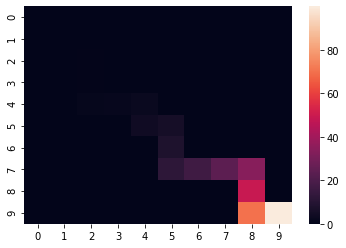

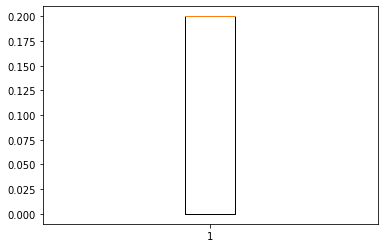

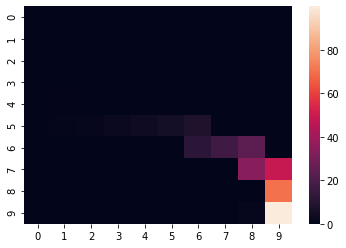

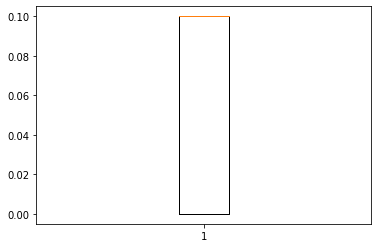

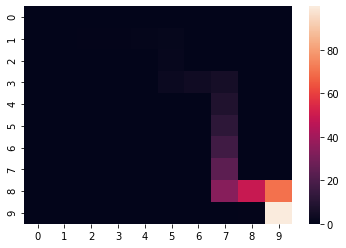

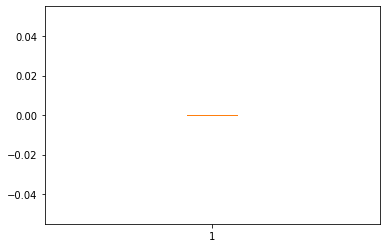

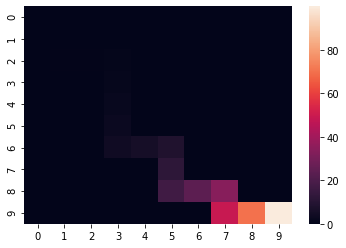

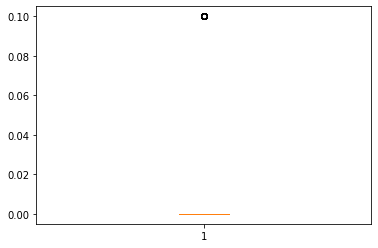

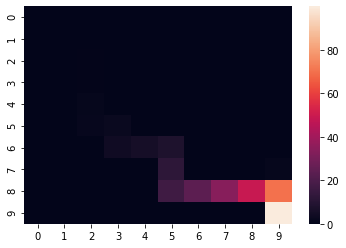

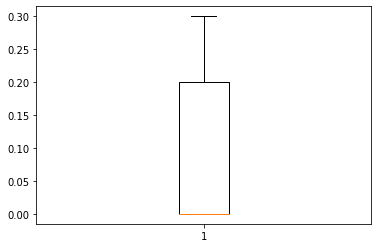

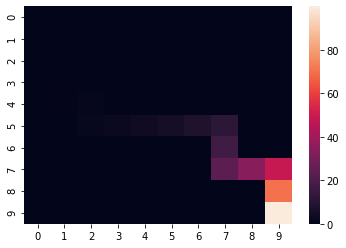

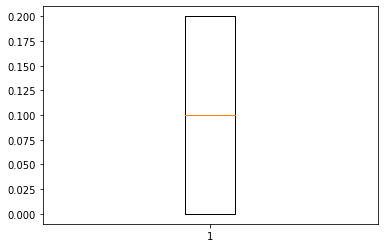

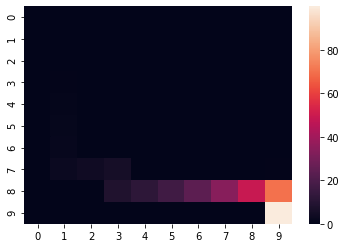

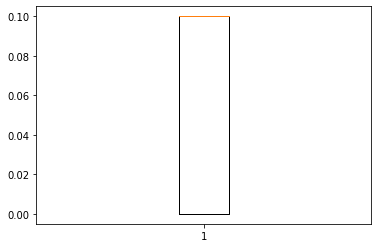

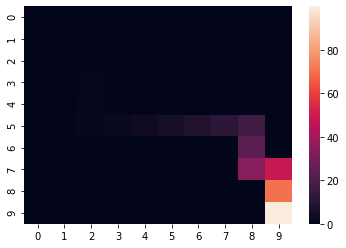

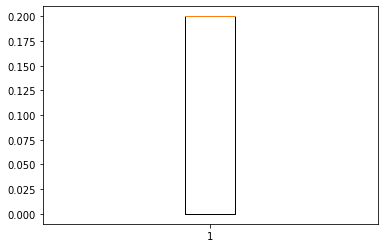

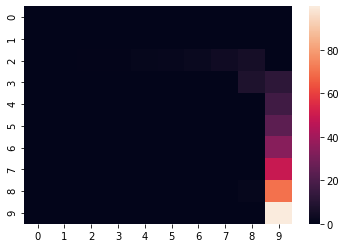

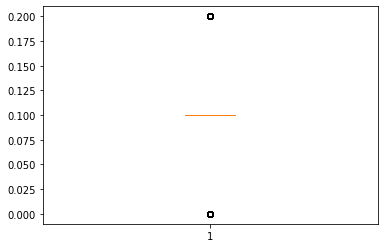

Average run-times: 0.02942664623260498 Standard deviation: 0.000663787340387786


In [10]:
random.seed(seed)
search(10,10000, 0.05, 0.7)

### Alfa 0.7 - Discount 0.9

Com um alfa alto o agente consegue descobrir mais do que um caminho possível. Na minha opinião isto tem a vantagem de o mesmo não ficar preso num 'maximo local'

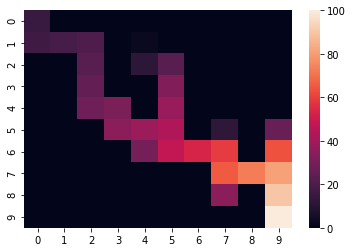

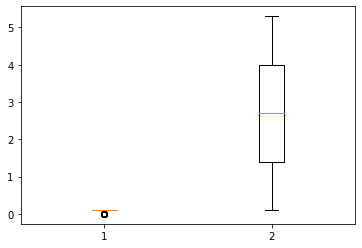

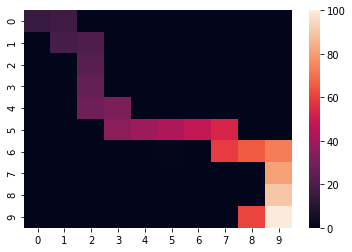

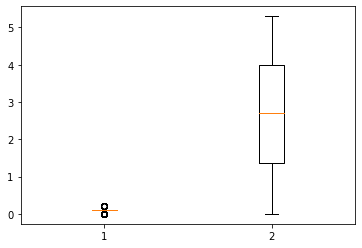

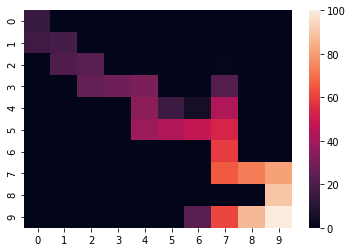

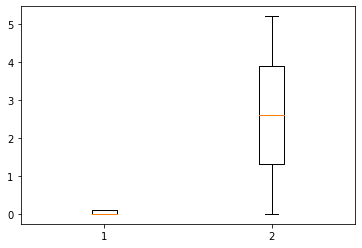

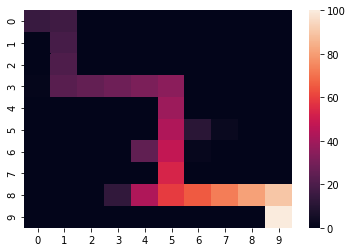

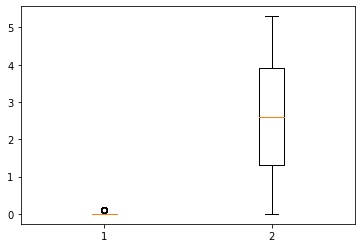

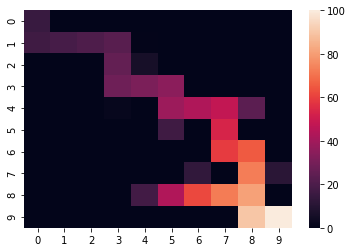

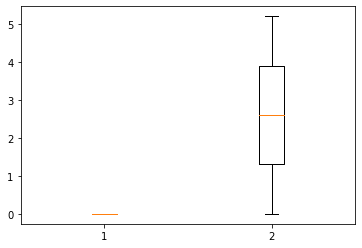

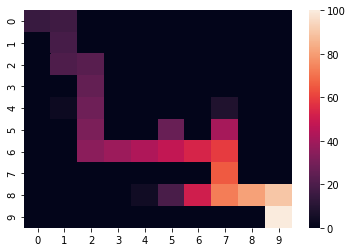

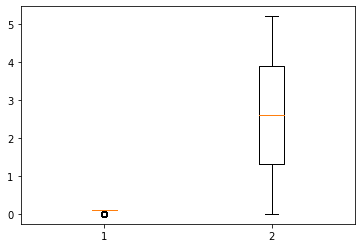

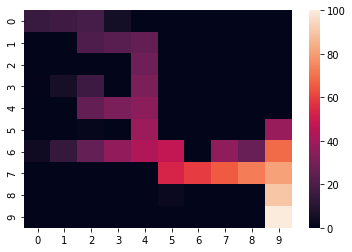

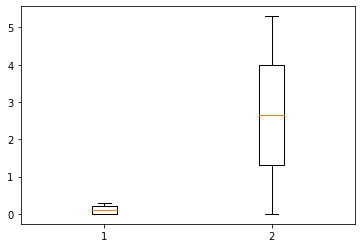

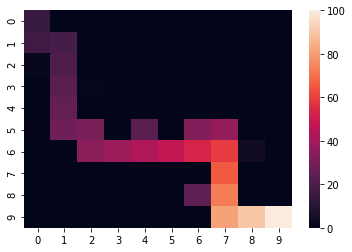

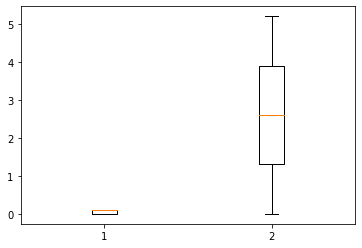

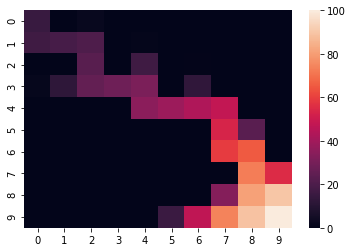

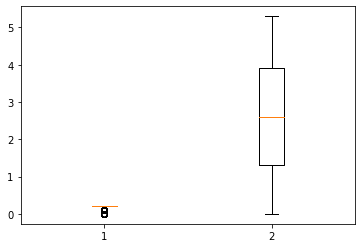

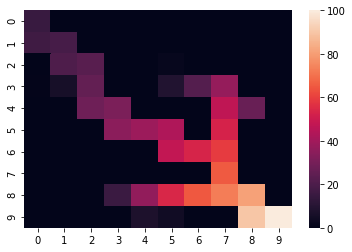

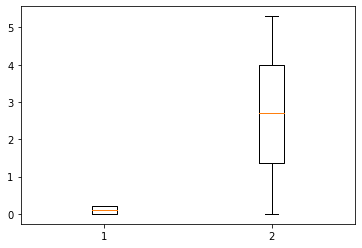

Average run-times: 0.5379208326339722 Standard deviation: 0.005984121676223323


In [11]:
random.seed(seed)
search(10,200000, 0.7, 0.9)

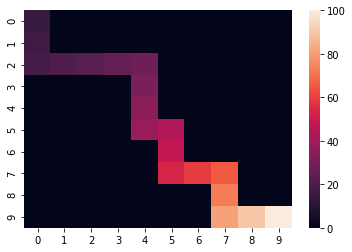

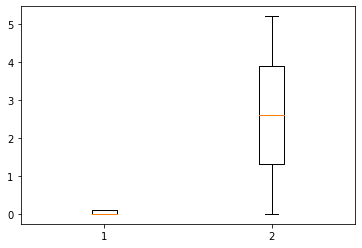

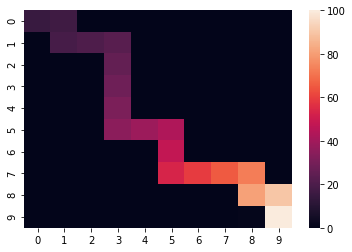

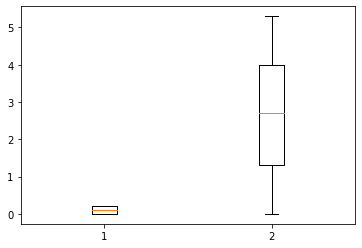

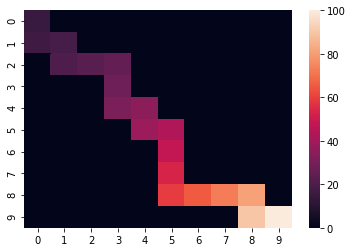

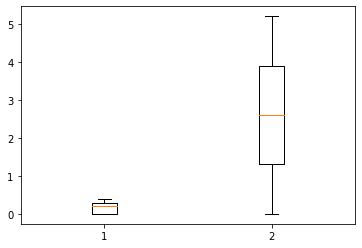

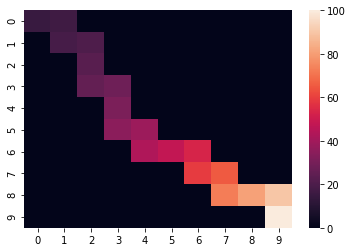

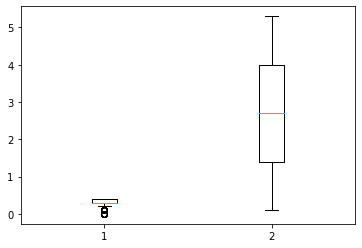

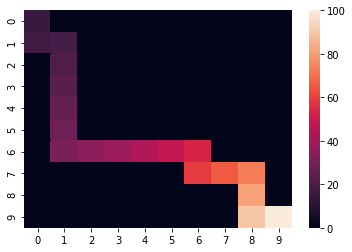

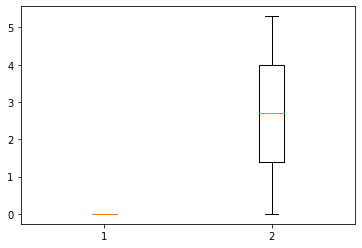

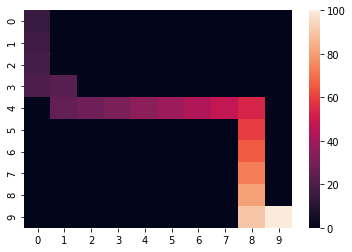

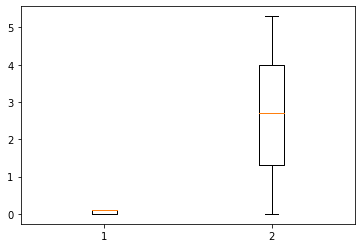

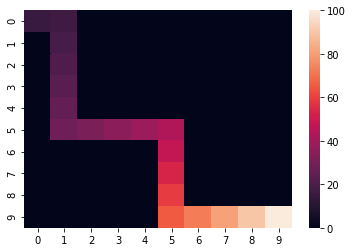

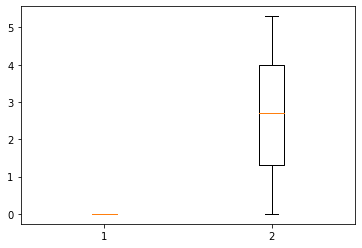

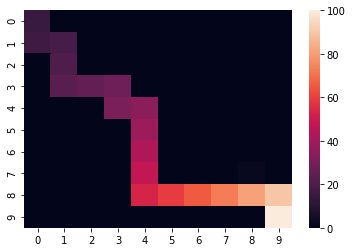

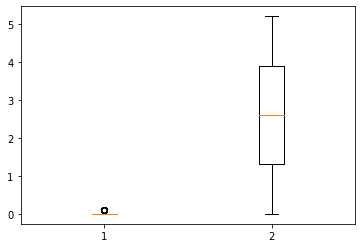

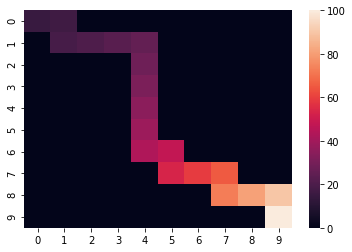

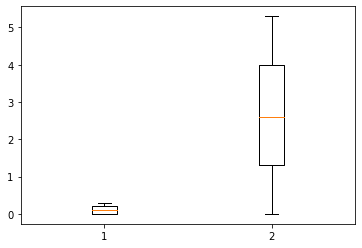

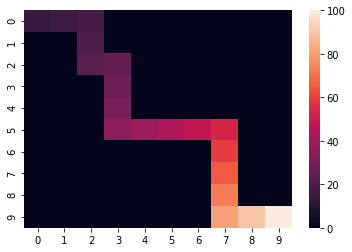

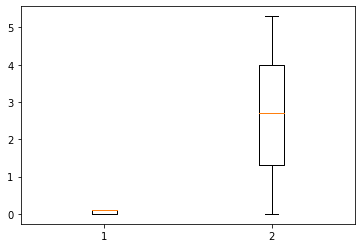

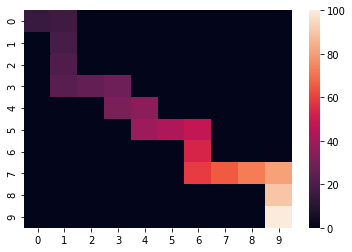

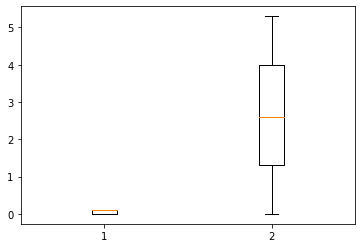

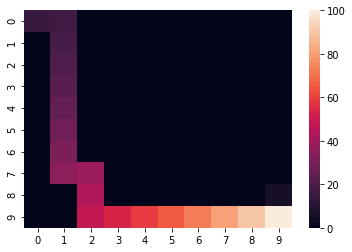

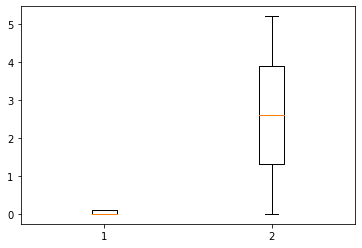

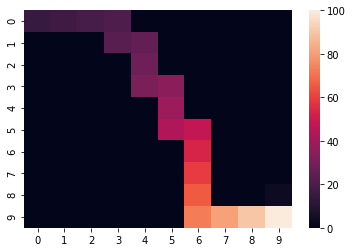

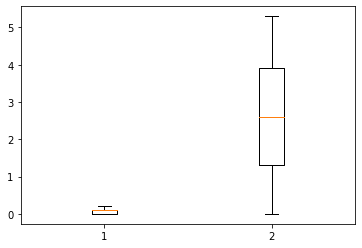

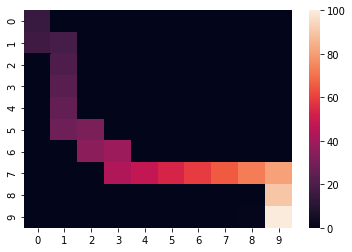

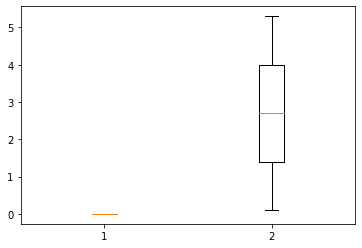

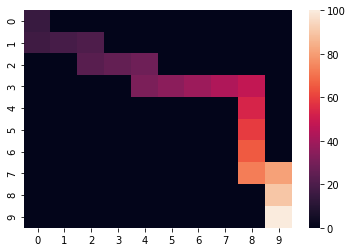

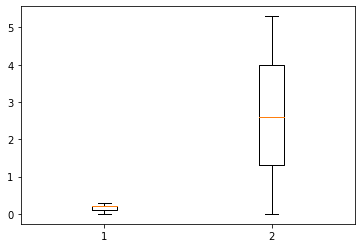

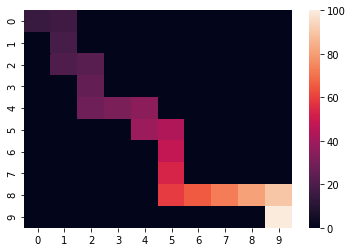

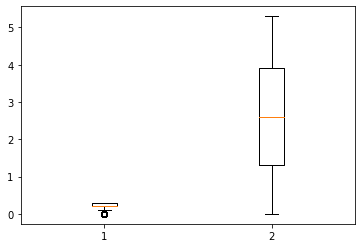

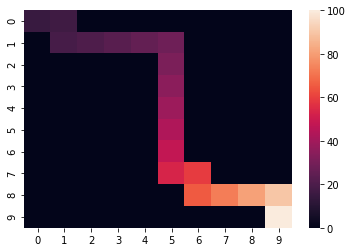

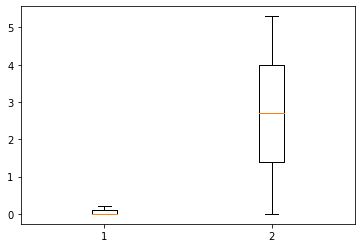

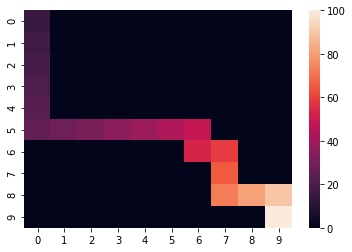

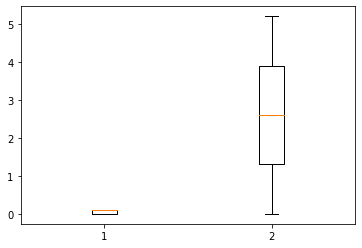

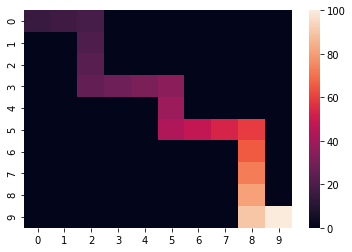

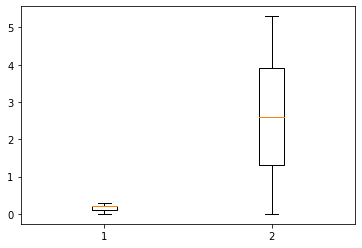

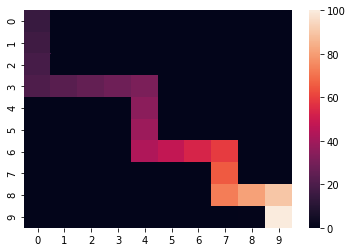

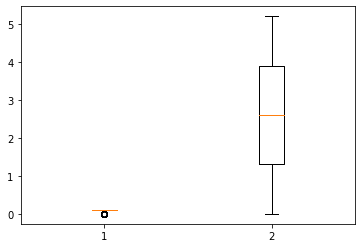

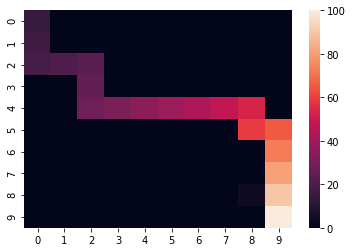

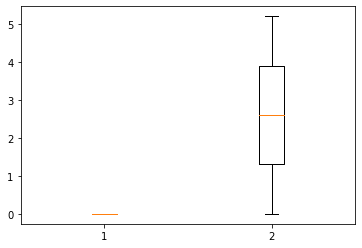

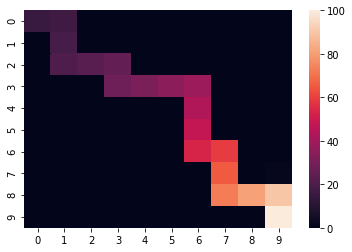

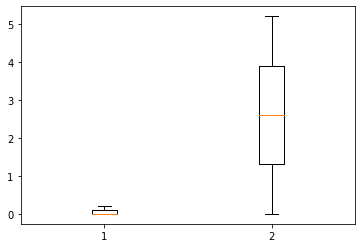

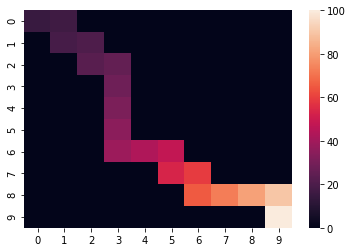

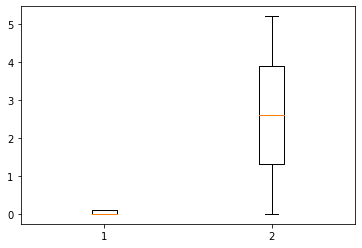

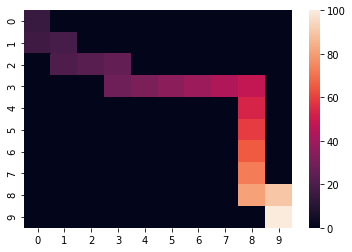

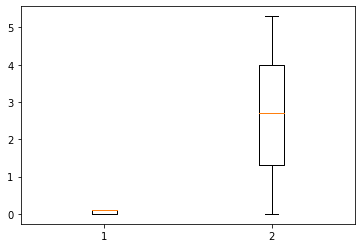

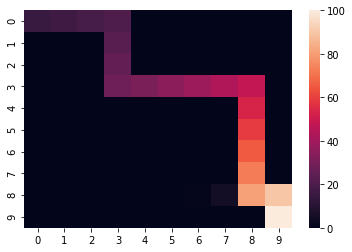

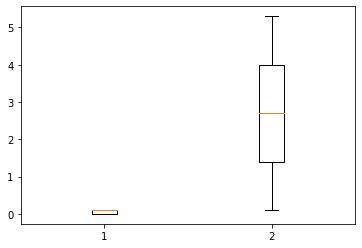

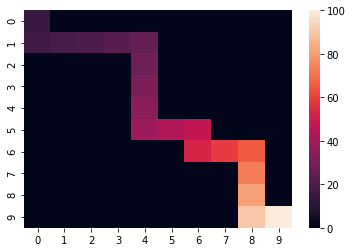

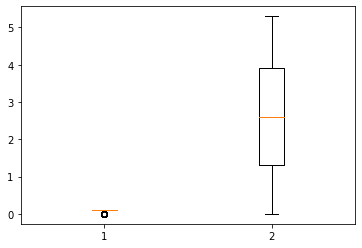

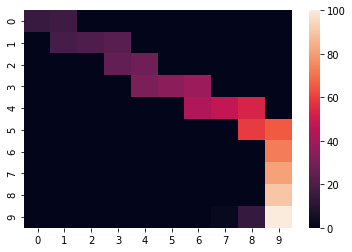

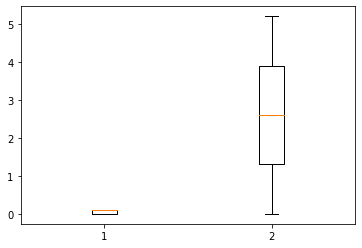

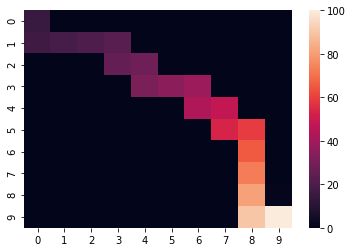

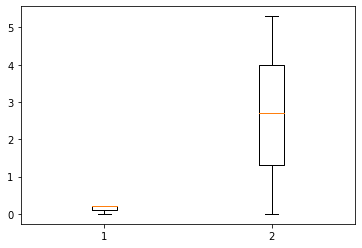

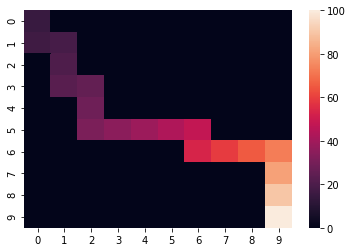

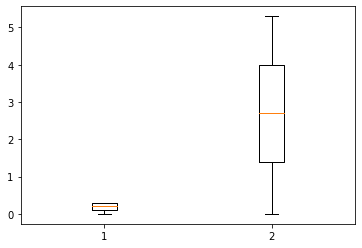

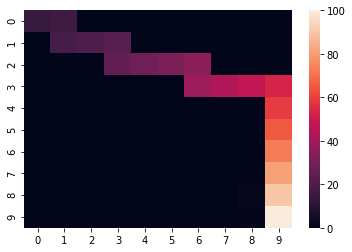

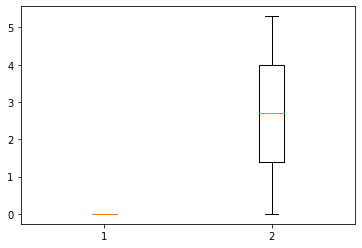

Average run-times: 0.05889201958974202 Standard deviation: 0.0007350237214861178


In [33]:
search(30,20000, 0.05, 0.9)

#### Exercicio 3 - Average run-times: 0.023421327273050945 Standard deviation: 0.0007123812641739872 
#### Exercicio 4 - Average run-times: 0.059454123179117836 Standard deviation: 0.000841521077330861

___Can you also say
(only with that information) which is the sequence of actions that will get the robot to its goal? What
other information is required to know the sequence of actions? Do you have any indication if that
sequence of states is a good solution? The best solution? What if the numbers of the states were
shuffled before training started and the state transition function was unknown, could you still use vector
V to choose an action?___


Como vimos nos heatmaps acima, o agente consegue descobrir a sequência de ações que o leva ao objetivo. Acho que todos os resultados, fora algumas exceções sao boas soluções. A melhor solução talvez dependa da alteração de alguns parâmetros de modo ao agente não ficar preso no primeiro caminho que encontre. 

Se os estados fossem baralhados e função de transição fosse desconhecida eu diria que o vector poderia ser usado na mesma para escolher uma ação desde que fosse possível ver o estados para que o agente possa transitar e a função de transição permitisse ao agente transitar corretamente. 

# Exercício 5

In [12]:
# Como estamos a lidar com uma matrix e nao um vetor, defini esta funcao para gerar o heatmap para os exercicios seguintes
def generate_heatmap(matrix):
    matrix2arr = []
    for j in range(len(matrix)):
        matrix2arr.append(max(matrix[j]))
    arr = np.asmatrix(np.split(np.array(matrix2arr), 10))
    sns.heatmap(arr)
    plt.show()
    return arr

In [13]:

def choose_action(state, matrix):
    possible_actions = []
    if state % 10 == 1:
        possible_actions.append(1)
    elif state % 10 == 0:
        possible_actions.append(0)
    else:
        possible_actions.append(1)
        possible_actions.append(0)
    if state - 10 > 0: possible_actions.append(2)
    if state + 10 <= 100: possible_actions.append(3)
    possible_states_utility = []
    for i in possible_actions:
        possible_states_utility.append(matrix[state - 1][i])
    m = max(possible_states_utility)
    max_idx = [i for i, j in enumerate(possible_states_utility) if j == m]
    chosen_action = random.choice(max_idx)
    return possible_actions[chosen_action]

def epoch(iterations, matrix, alfa, discount):
    state = 1
    steps = [100, 200, 500, 600, 700, 800, 900, 1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 19999]
    average_reward_lst = []
    for i in range(iterations):
        
        if i in steps:
            lst = []
            acc_reward = 0
            for j in range(1000):
                action = choose_action(state, matrix)
                if action == 0:
                    next_state = state - 1
                elif action == 1:
                    next_state = state + 1
                elif action == 2:
                    next_state = state - 10
                elif action == 3:
                    next_state = state + 10
                step_reward = reward(state)
                acc_reward = acc_reward + step_reward
                if state == 100:
                    state = 1
                else:
                    state = next_state
                average_reward = acc_reward / 1000
                lst.append(average_reward)
            average_reward_lst.append(lst)

        if state == 100:
            action_reward = reward(state)
            matrix[state - 1][action] = (1 - alfa) * matrix[state - 1][action] + alfa * (action_reward + discount * 0)
            state = 1

        else:
            action = choose_action(state, matrix)
            if action == 0:
                next_state = state - 1
            elif action == 1:
                next_state = state + 1
            elif action == 2:
                next_state = state - 10
            elif action == 3:
                next_state = state + 10
            action_reward = reward(state)
            matrix[state - 1][action] = (1 - alfa) * matrix[state - 1][action] + alfa * (action_reward + discount * max(matrix[next_state - 1]))
            state = next_state
             
    return matrix


def search(nr_epochs, iterations, minmax, alfa, discount):
    for k in range(nr_epochs):
        matrix = [[random.uniform(minmax[0], minmax[1]) for j in range(4)] for i in range(100)]
        generate_heatmap(epoch(20000, matrix, alfa, discount))


### Matriz inicializada com valores positivos pequenos

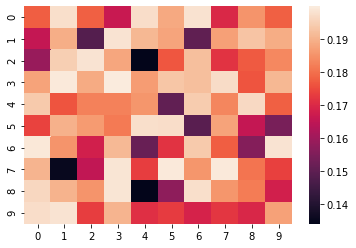

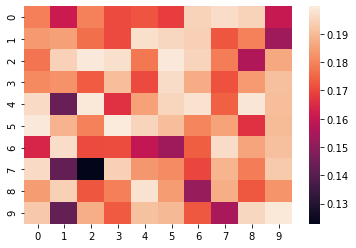

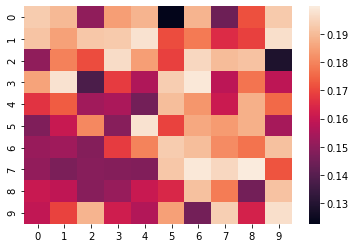

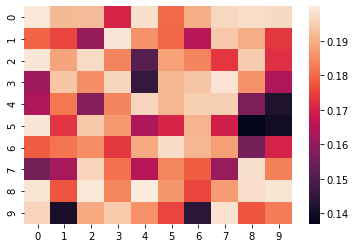

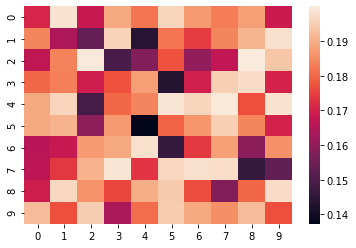

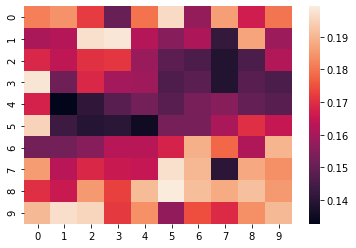

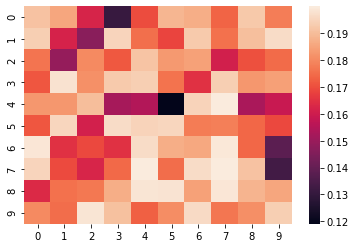

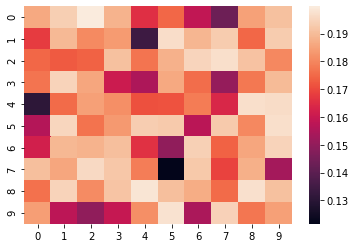

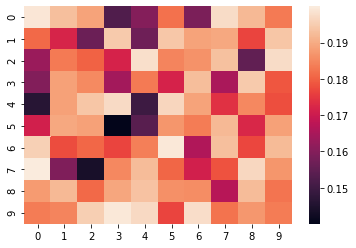

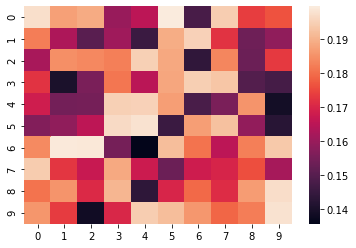

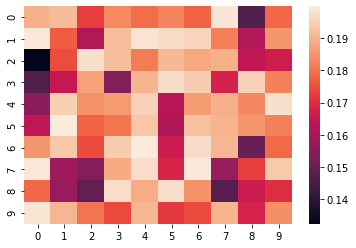

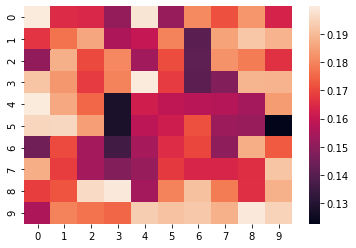

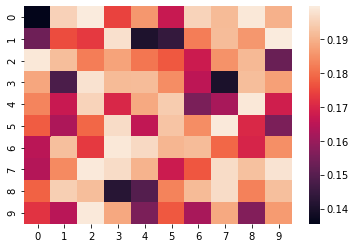

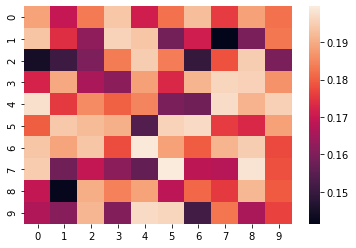

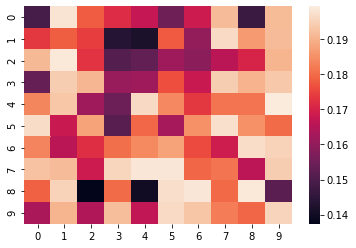

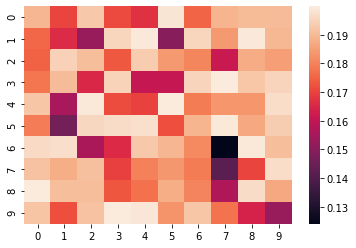

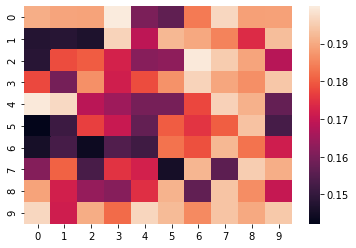

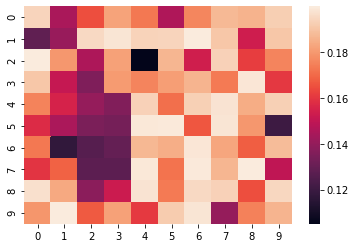

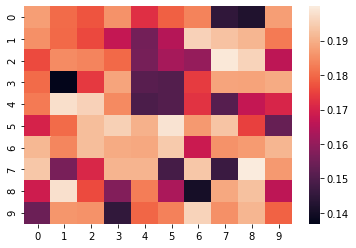

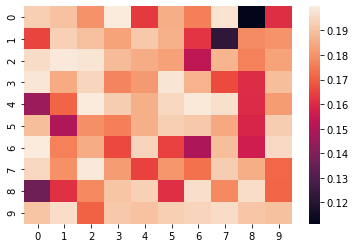

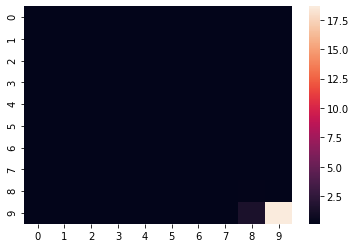

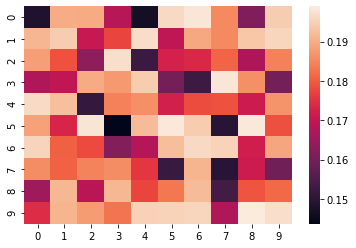

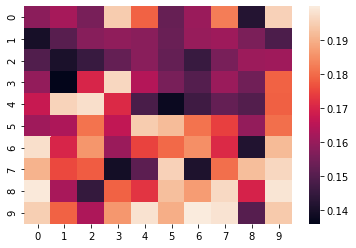

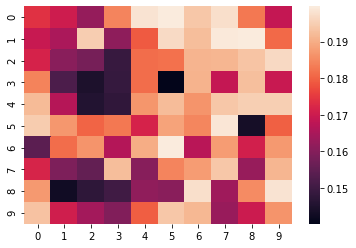

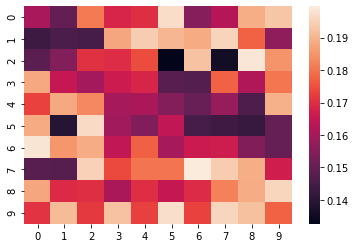

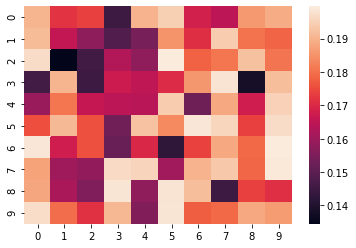

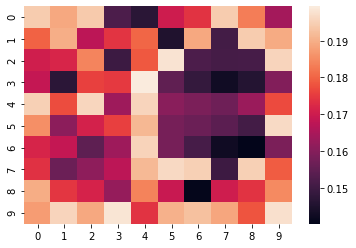

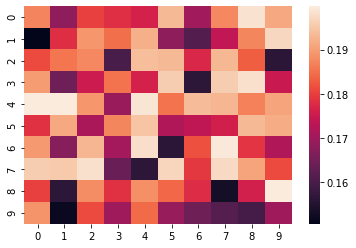

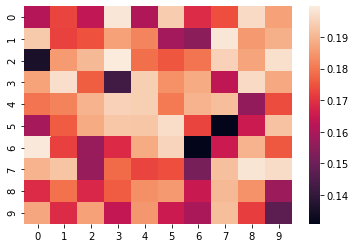

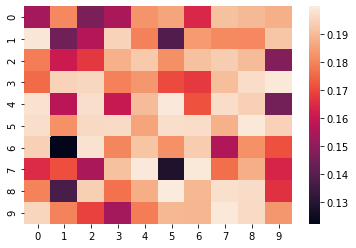

In [14]:
random.seed(seed)
search(30, 20000, [.1, .2], 0.05, 0.9)

### Matriz inicializada a 0

Com a matrix inicializada a 0 as primeiras ações são sempre aleatórias.

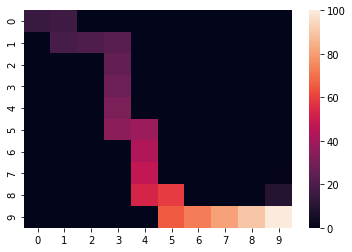

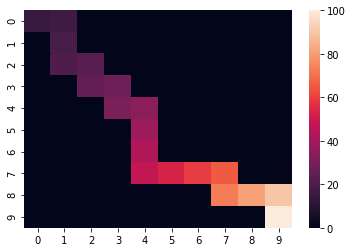

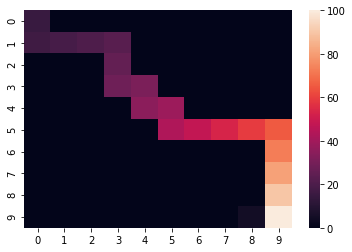

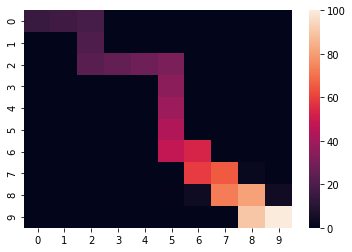

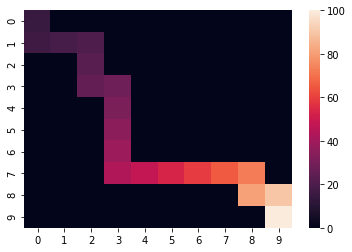

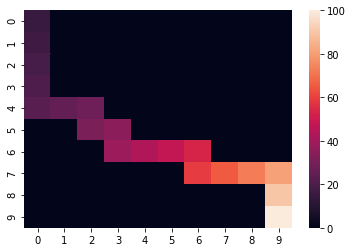

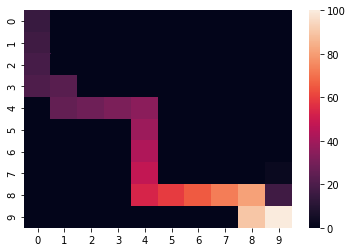

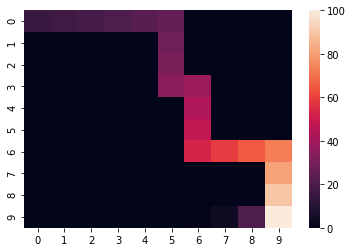

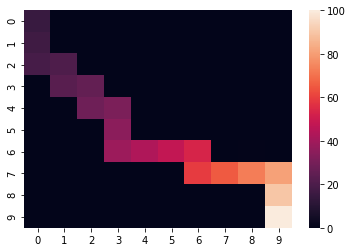

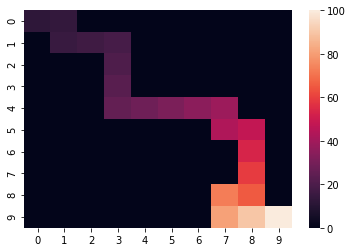

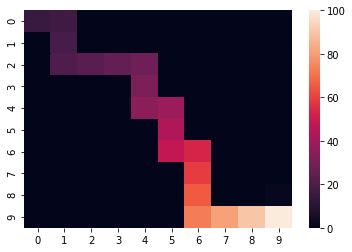

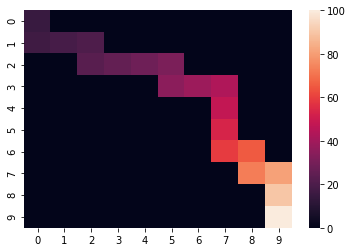

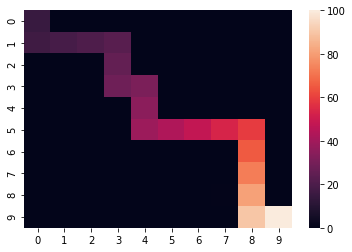

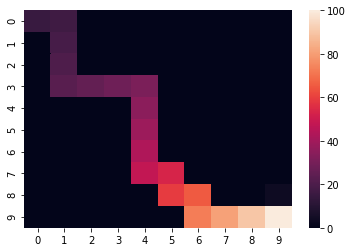

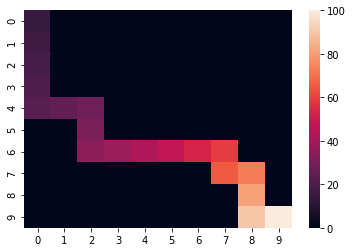

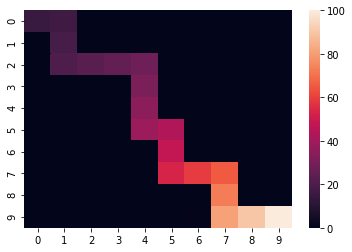

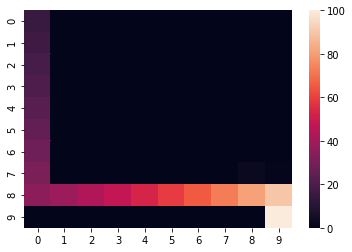

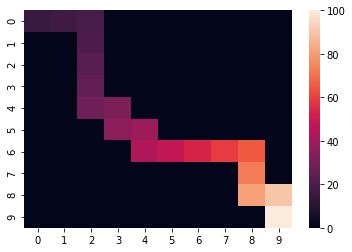

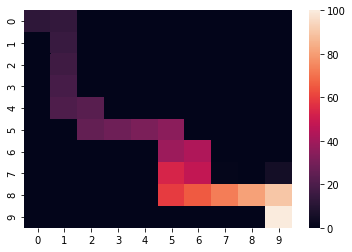

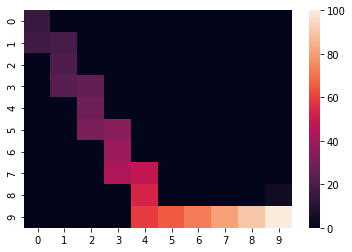

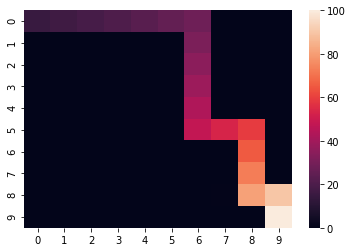

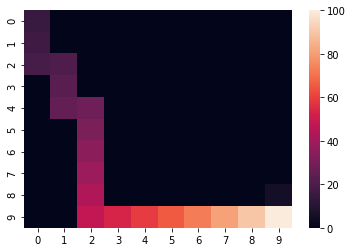

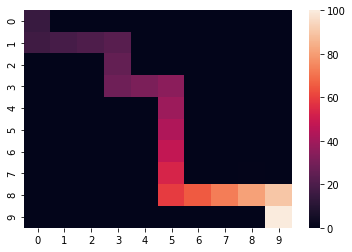

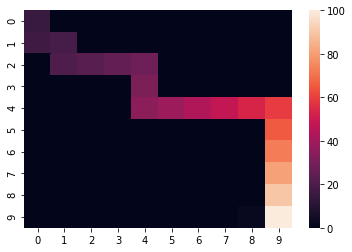

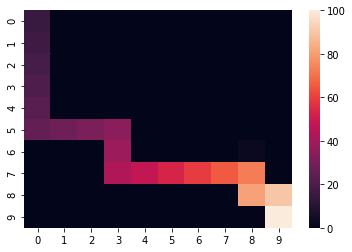

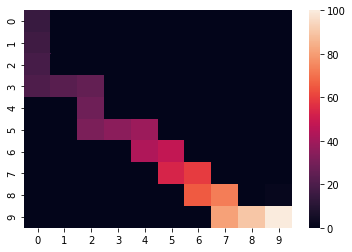

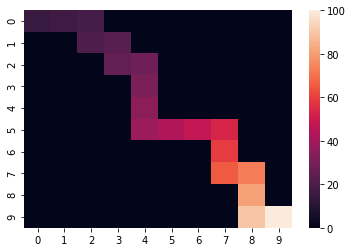

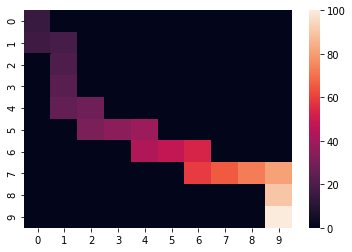

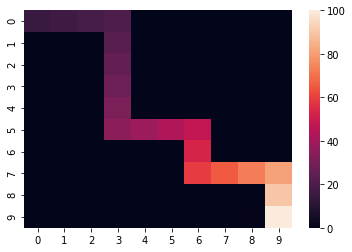

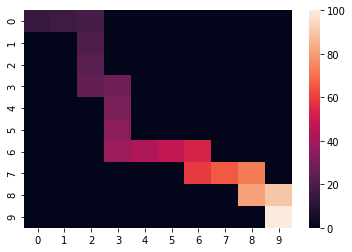

In [15]:
random.seed(seed)
search(30, 20000, [0, 0], 0.05, 0.9)

### Matriz inicializada com valores entre -.1 e .1

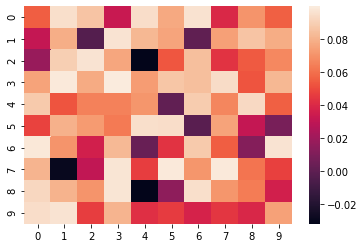

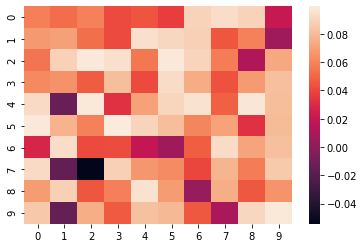

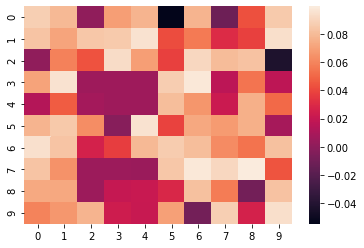

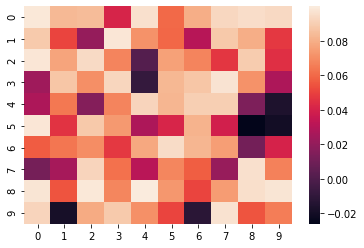

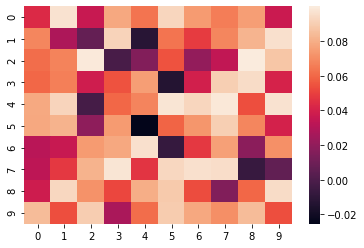

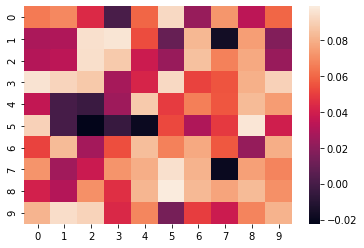

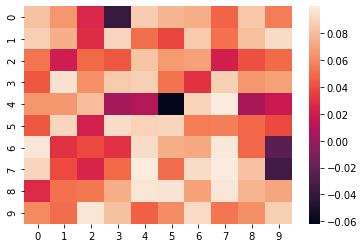

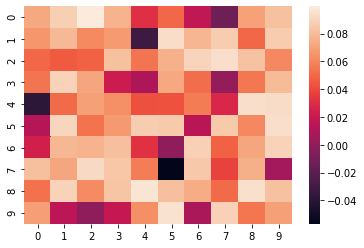

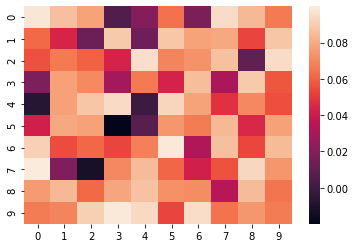

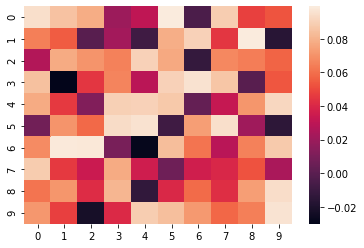

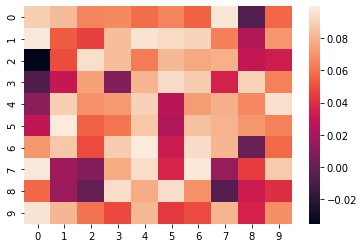

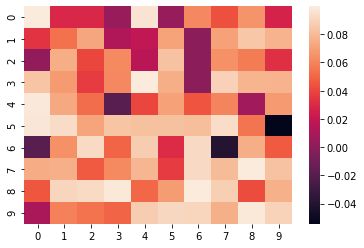

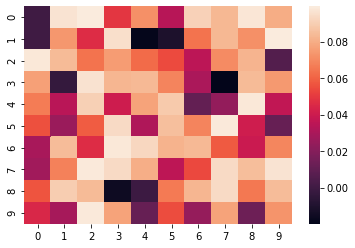

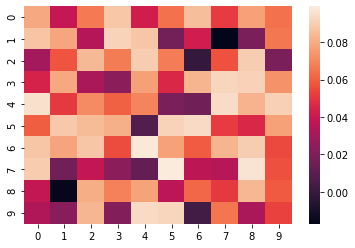

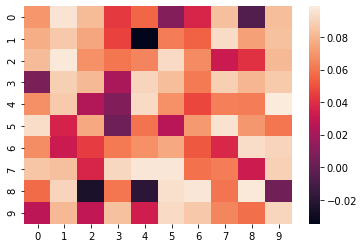

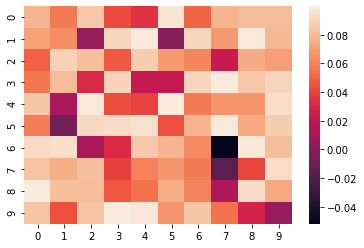

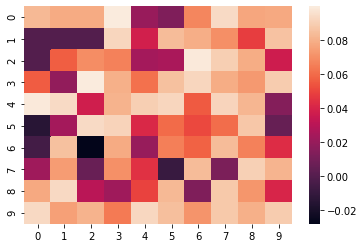

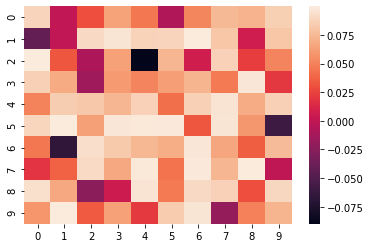

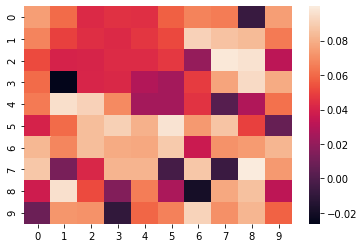

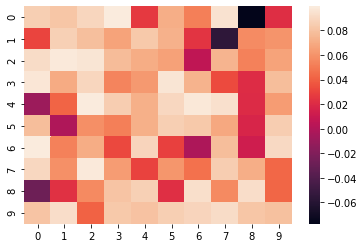

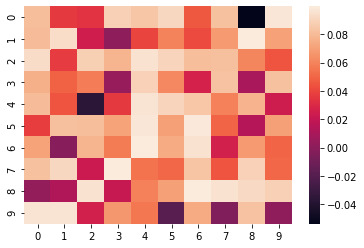

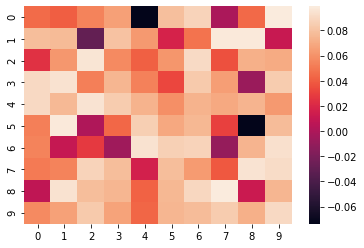

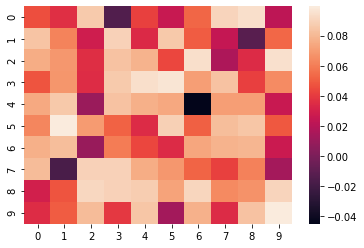

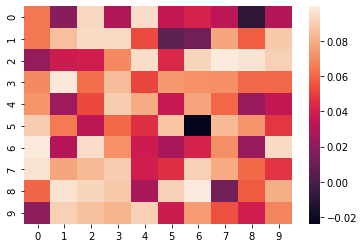

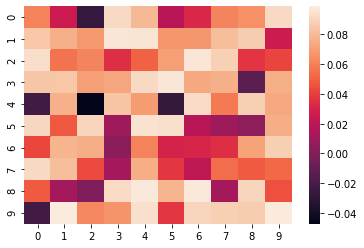

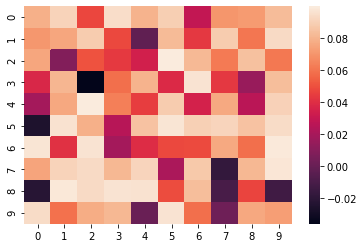

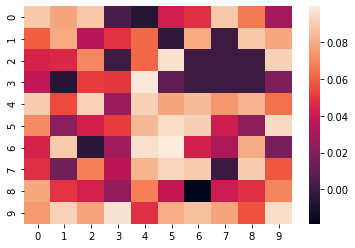

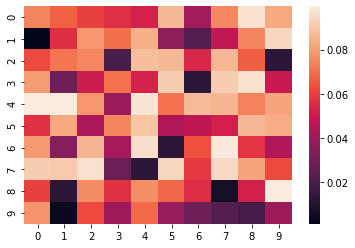

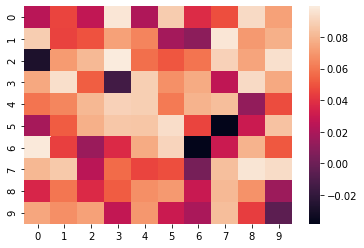

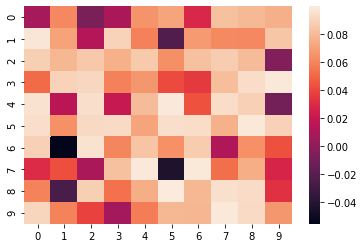

In [16]:
random.seed(seed)
search(30, 20000, [-.1, .1], 0.05, 0.9)

# Exercício 6

In [31]:
def choose_action(state, matrix, greed):
    possible_actions = []
    if state % 10 == 1:
        possible_actions.append(1)
    elif state % 10 == 0:
        possible_actions.append(0)
    else:
        possible_actions.append(0)
        possible_actions.append(1)
    if state - 10 > 0: possible_actions.append(2)
    if state + 10 <= 100: possible_actions.append(3)
    possible_states_utility = []
    for i in possible_actions:
        possible_states_utility.append(matrix[state - 1][i])
    is_greedy = random.random()
    if greed > is_greedy:
        m = max(possible_states_utility)
        max_idx = [i for i, j in enumerate(possible_states_utility) if j == m]
        chosen_action = random.choice(max_idx)
        return possible_actions[chosen_action]
    else:
        return random.choice(possible_actions)
    
def epoch(iterations, matrix, alfa, discount, greed):
    state = 1
    increase_greed = False
    if greed == .3:
        increase_greed = True

    for i in range(iterations):
        
        if i > iterations * .3 and increase_greed and greed < 1:
            greed = greed + 1/(iterations*.7)

        if state == 100:
            action_reward = reward(state)
            matrix[state - 1][action] = (1 - alfa) * matrix[state - 1][action] + alfa * (action_reward + discount * 0)
            state = 1

        else:
            action = choose_action(state, matrix, greed)
            if action == 0:
                next_state = state - 1
            elif action == 1:
                next_state = state + 1
            elif action == 2:
                next_state = state - 10
            elif action == 3:
                next_state = state + 10
            action_reward = reward(state)
            matrix[state - 1][action] = (1 - alfa) * matrix[state - 1][action] + alfa * (
                    action_reward + discount * max(matrix[next_state - 1]))
            state = next_state
    return matrix


def search(nr_epochs, iterations, minmax, alfa, discount, greed):
    for t in range(nr_epochs):
        util_matrix = [[random.uniform(minmax[0], minmax[1]) for h in range(4)] for k in range(100)]
        generate_heatmap(epoch(iterations, util_matrix, alfa, discount, greed))

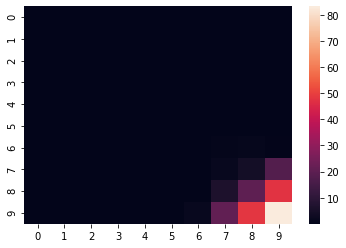

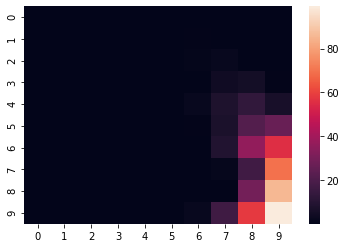

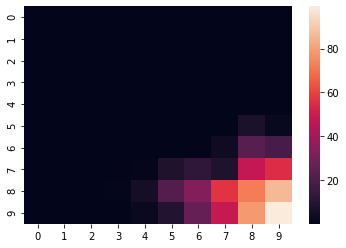

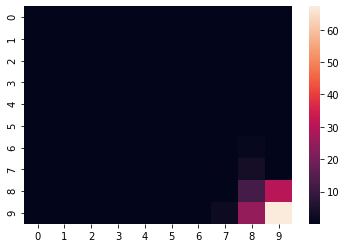

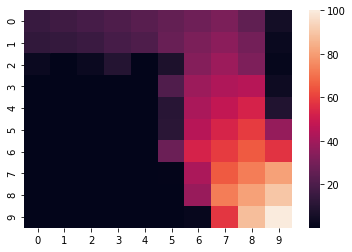

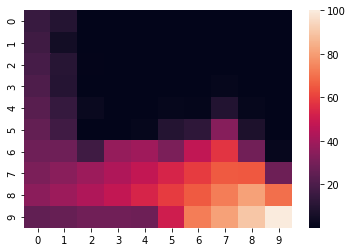

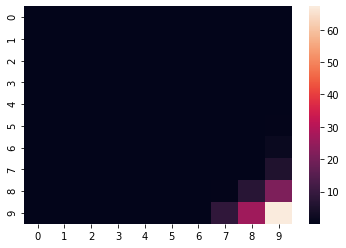

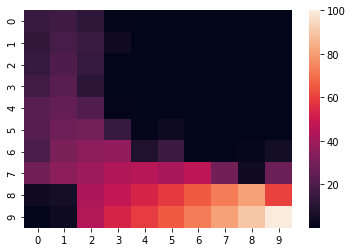

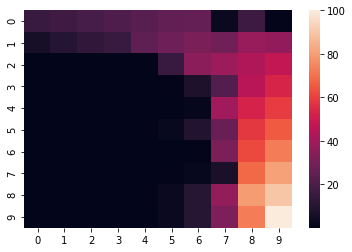

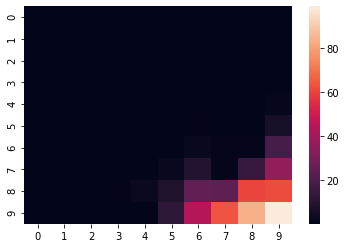

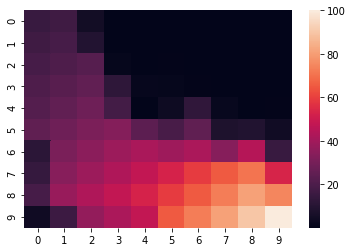

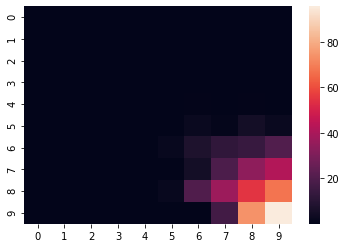

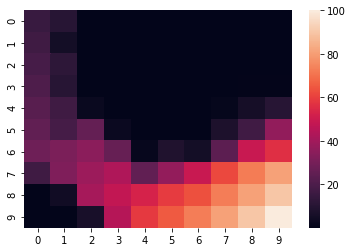

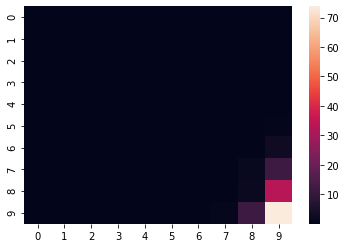

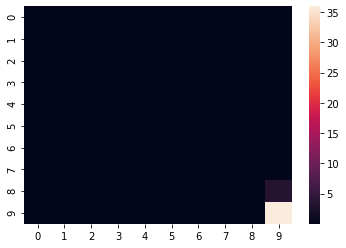

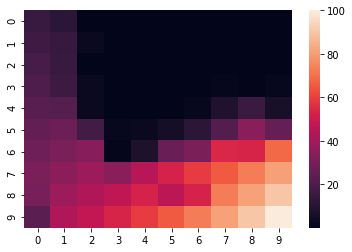

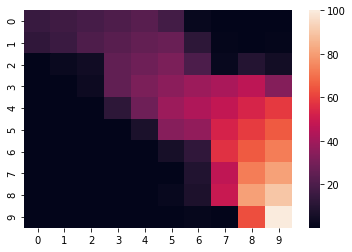

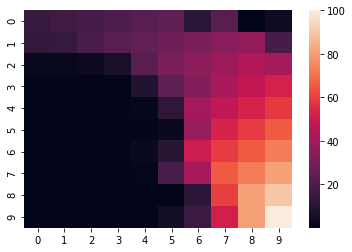

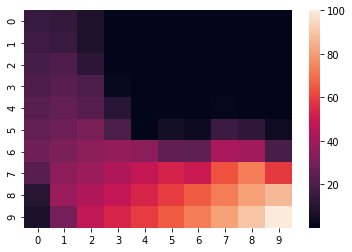

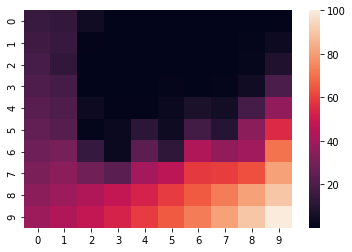

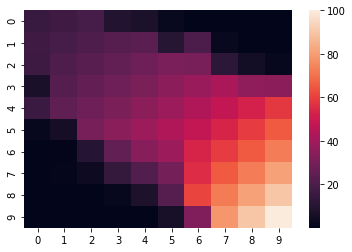

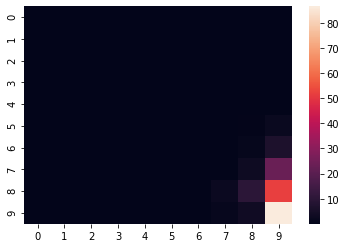

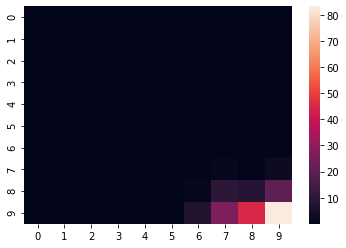

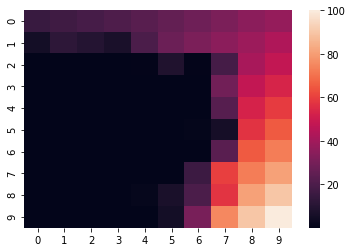

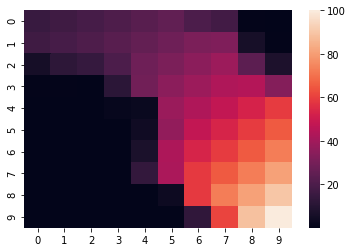

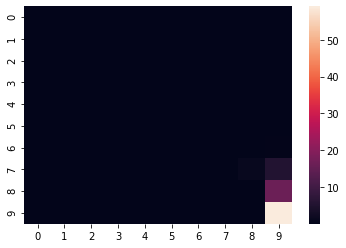

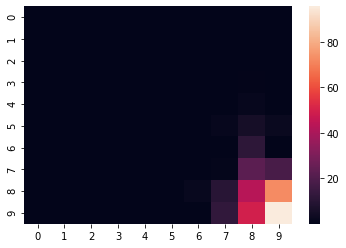

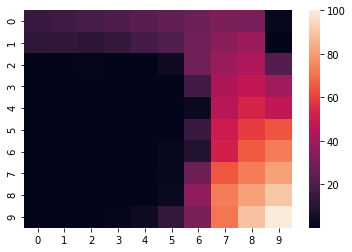

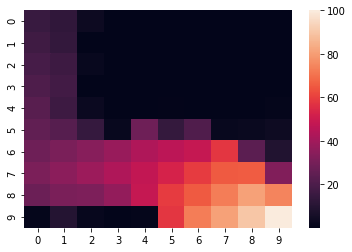

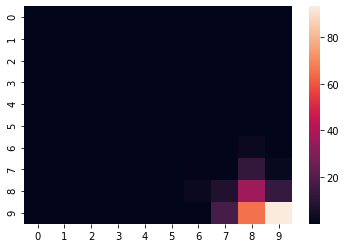

In [18]:
random.seed(seed)
search(30, 20000, [-.1,.1], 0.2, 0.9, 0.3)

# Exercício 7

In [19]:
#Surgiu-me uma duvida antes da entrega, no caso dos 5%, atualiza-se a 
#utilidade da acao escolhida ou da acao escolhida aleatoriamente?

def choose_action(state, matrix, greed):
    possible_actions = []
    if state % 10 == 1:
        possible_actions.append(1)
    elif state % 10 == 0:
        possible_actions.append(0)
    else:
        possible_actions.append(0)
        possible_actions.append(1)
    if state - 10 > 0: possible_actions.append(2)
    if state + 10 <= 100: possible_actions.append(3)
    possible_states_utility = []
    for i in possible_actions:
        possible_states_utility.append(matrix[state - 1][i])
    is_greedy = random.random()
    if greed > is_greedy:
        m = max(possible_states_utility)
        max_idx = [i for i, j in enumerate(possible_states_utility) if j == m]
        chosen_action = random.choice(max_idx)
        random_state = random.choices([True,False],[0.05,0.95])
        if random_state[0]:
            return random.choice(possible_actions)
        else:
            return possible_actions[chosen_action]
    else:
        return random.choice(possible_actions)

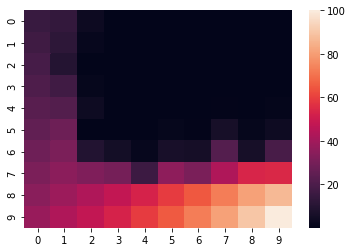

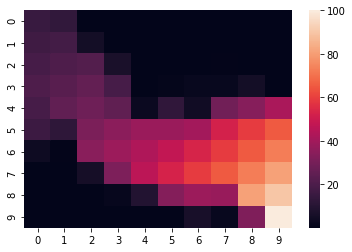

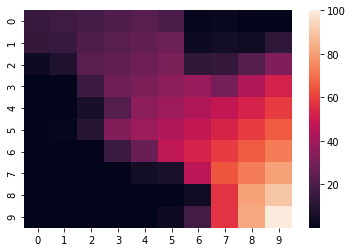

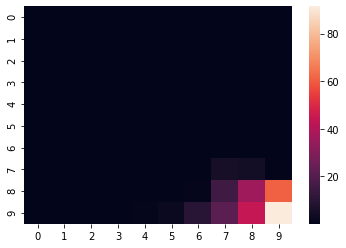

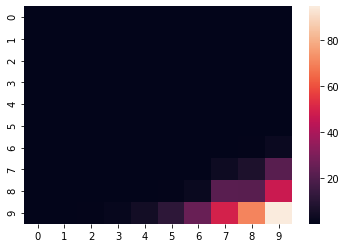

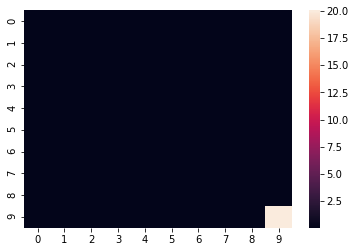

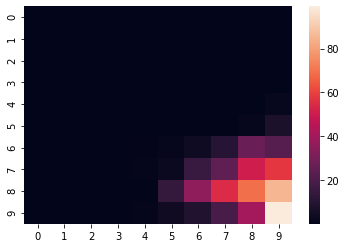

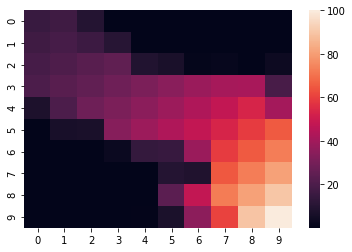

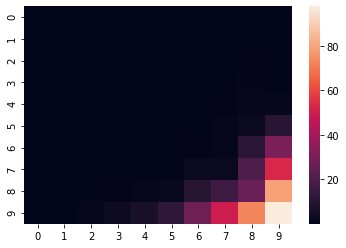

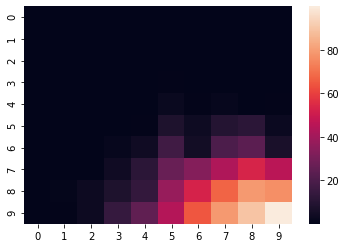

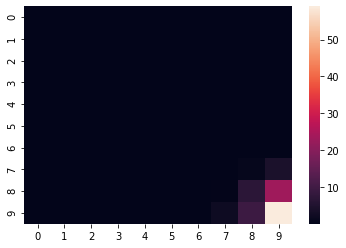

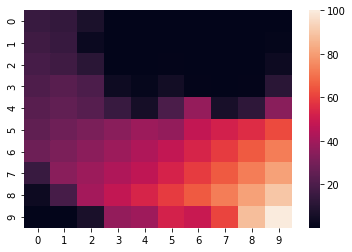

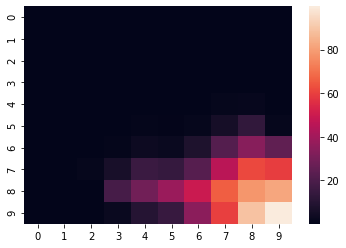

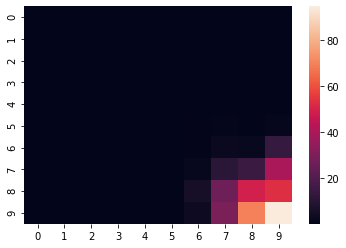

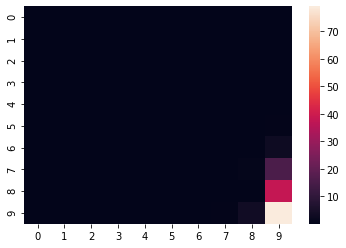

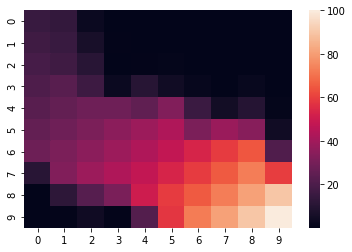

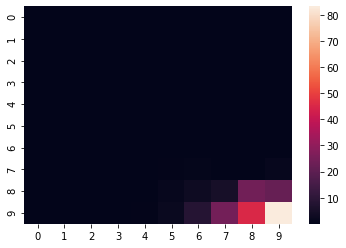

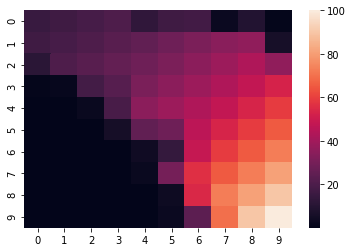

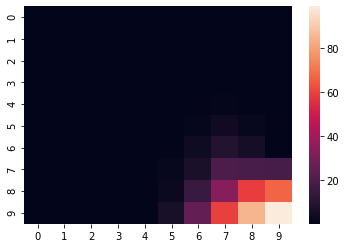

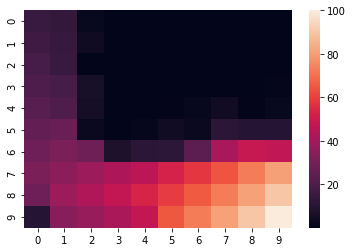

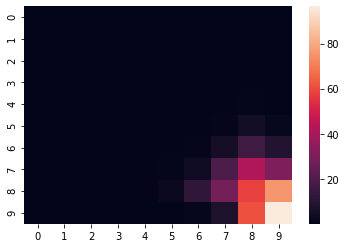

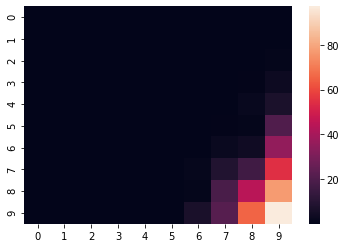

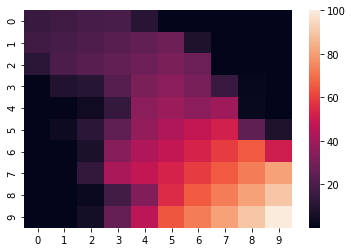

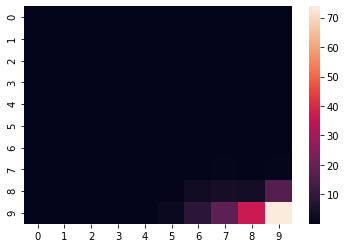

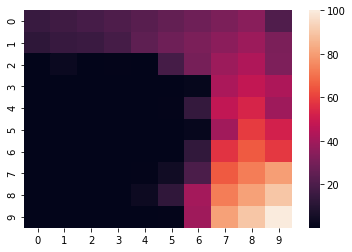

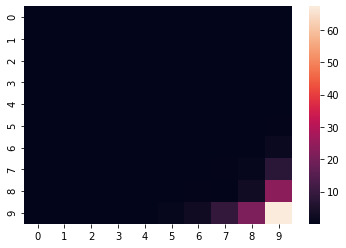

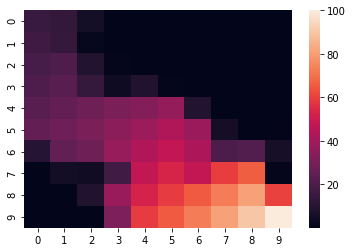

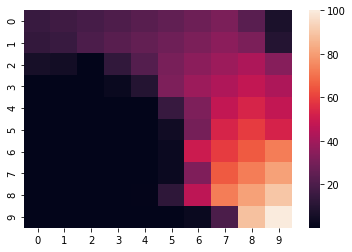

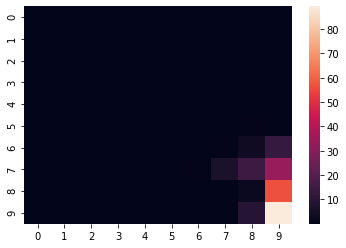

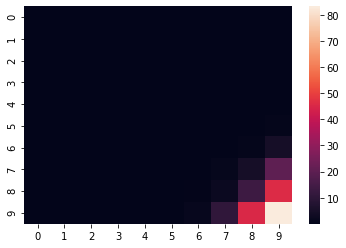

In [20]:
random.seed(seed)
search(30, 20000, [-.1,.1], 0.2, 0.9, 0.3)

# Exercício 8

Labirinto da Fig.1

In [21]:
def reward(state):
    walls = [3,13,23,33,43,53,63,73,83,17,27,37,47,57,67,77,87,97]
    if state == 100:
        return 100
    elif state in walls:
        return -100
    else:
        return 0

O labirinto foi resolvido usando o código desenvolvido no exercício 4

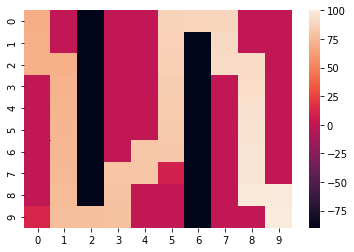

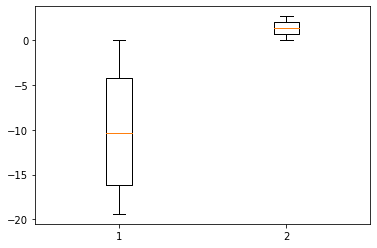

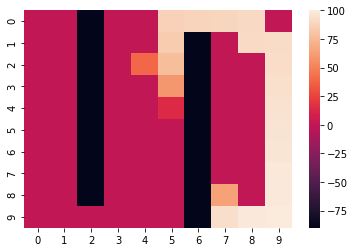

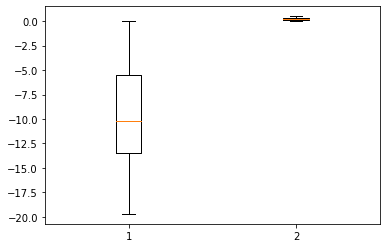

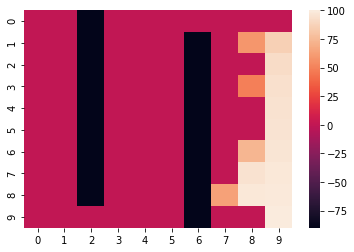

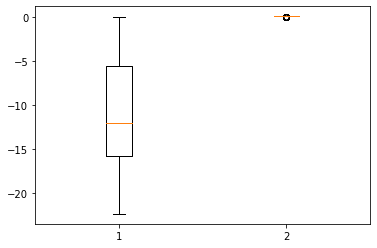

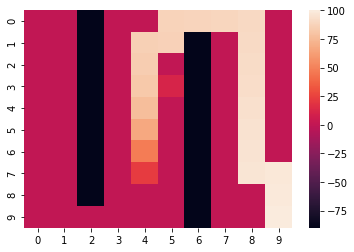

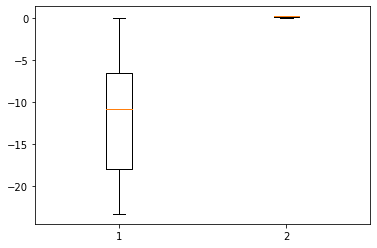

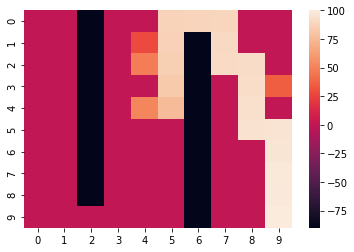

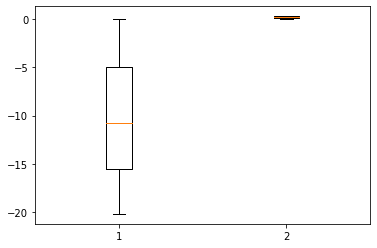

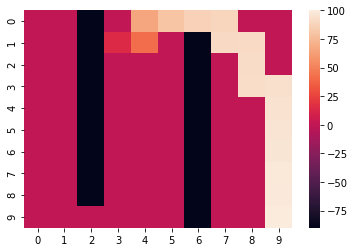

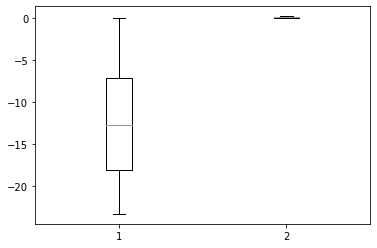

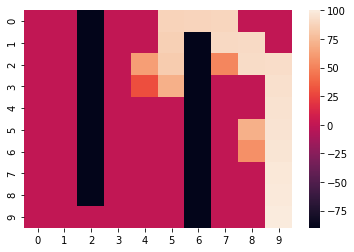

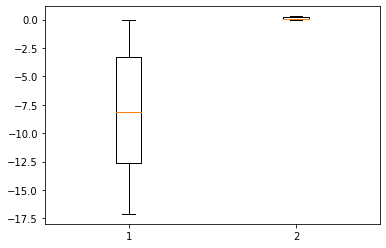

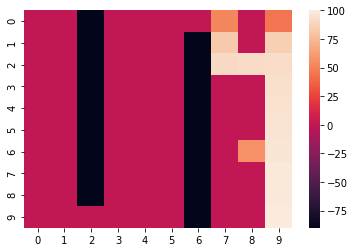

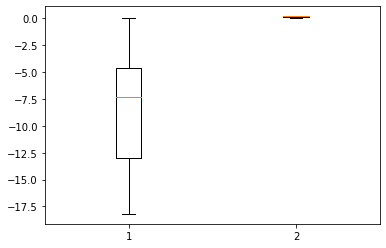

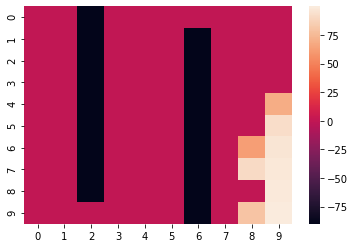

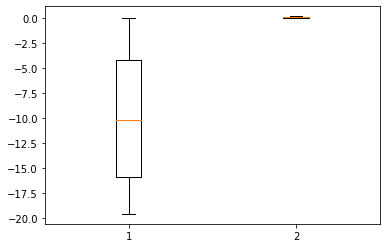

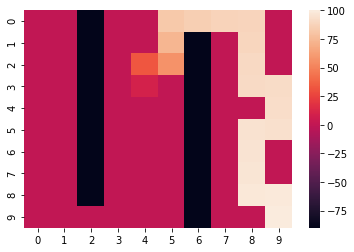

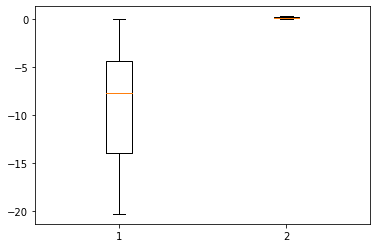

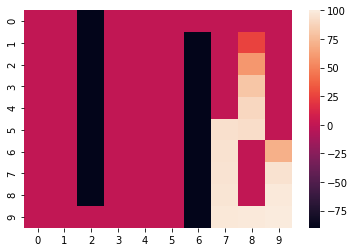

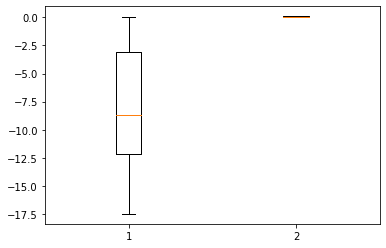

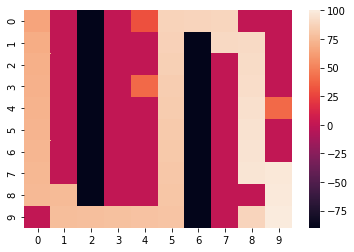

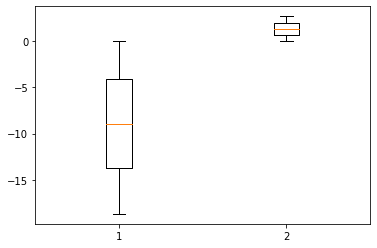

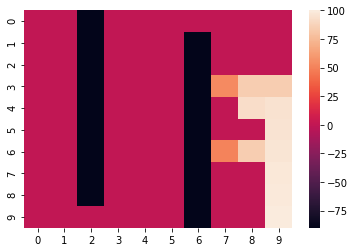

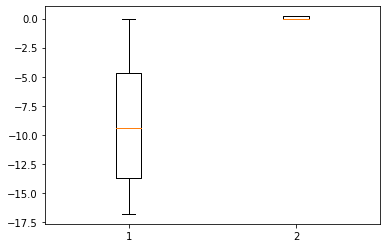

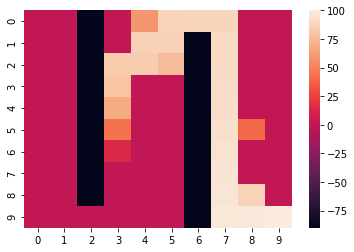

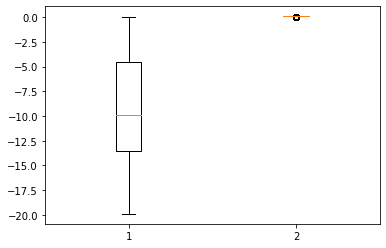

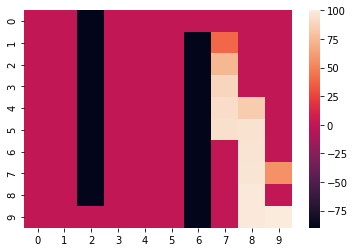

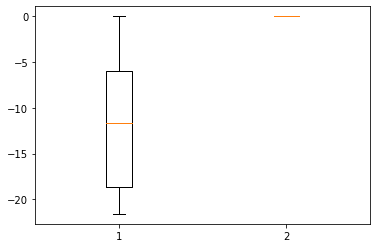

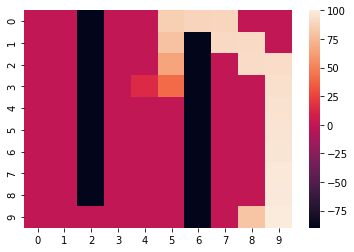

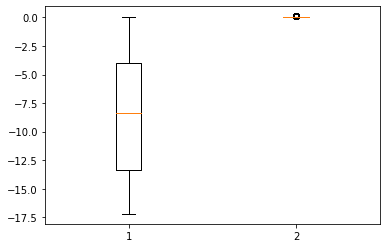

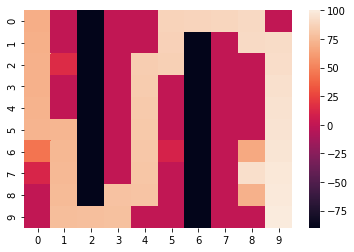

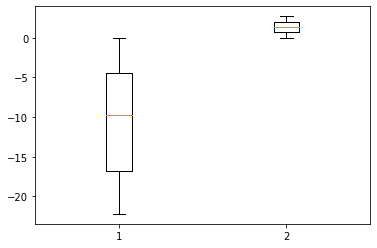

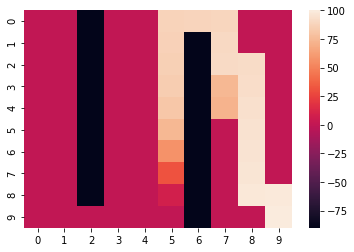

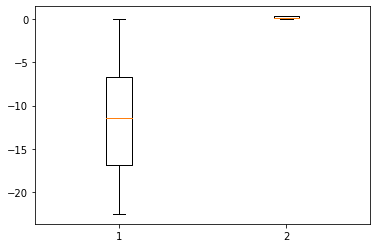

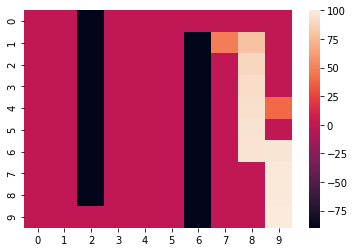

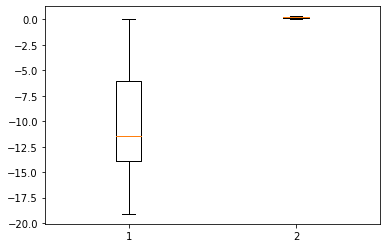

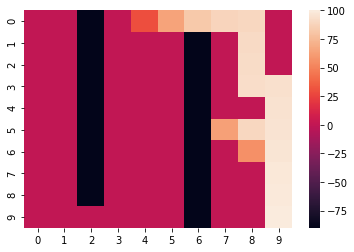

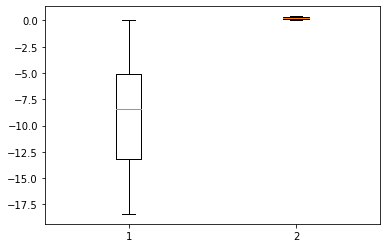

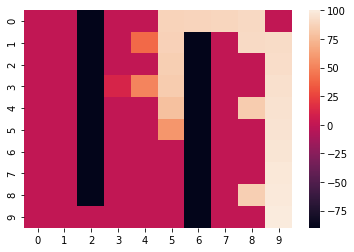

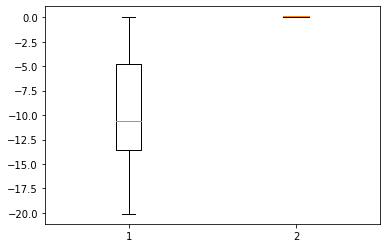

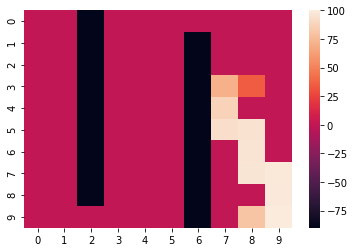

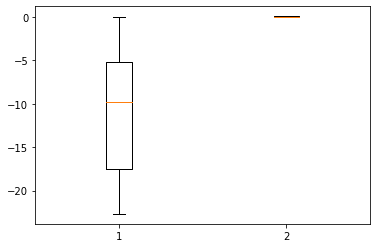

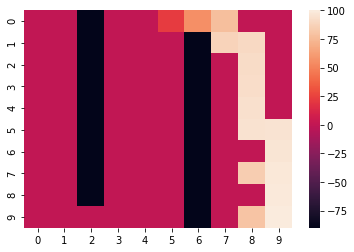

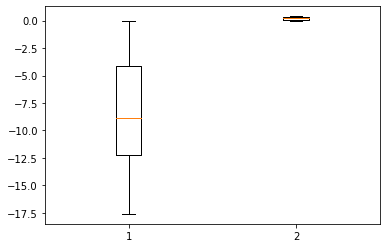

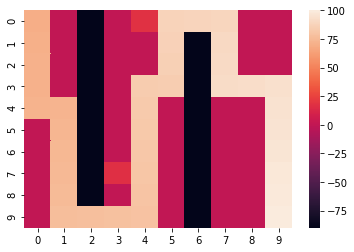

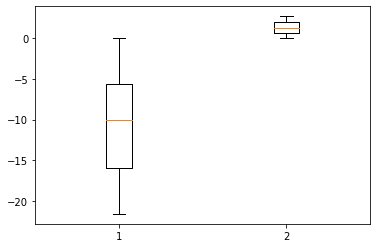

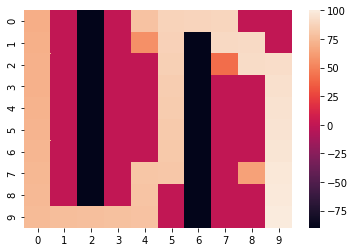

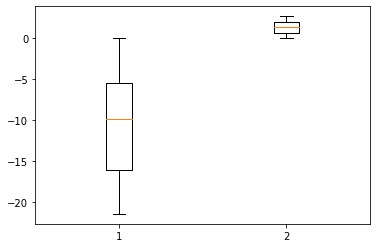

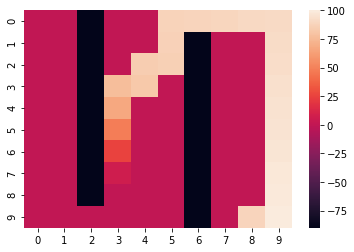

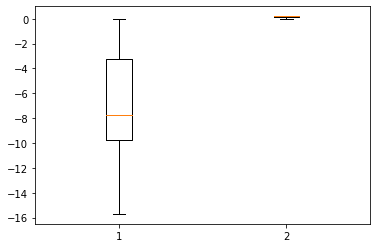

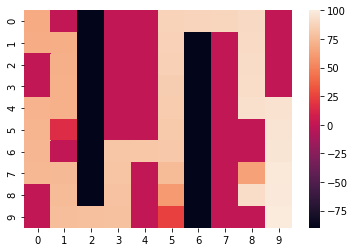

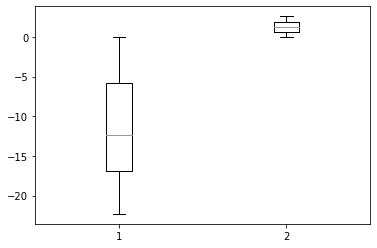

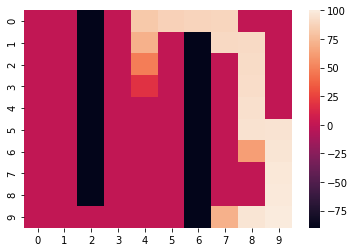

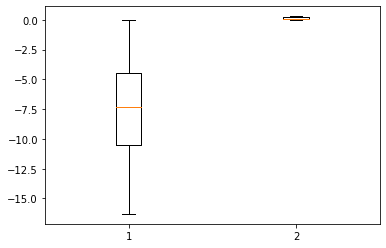

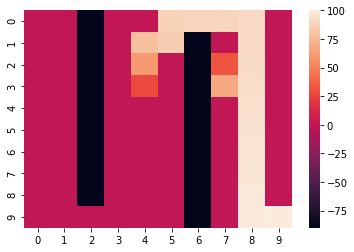

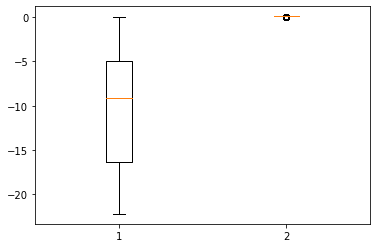

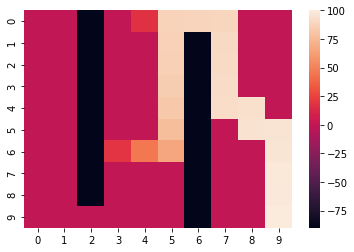

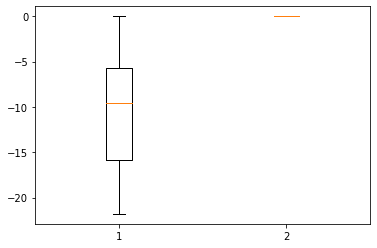

Average run-times: 0.06527291138966879 Standard deviation: 0.0008156327298107488


In [24]:
random.seed(seed)
search(30,20000, 0.9, 0.99)

Usando a implementação do exercício 6, alguns vezes o agente é capaz de descobrir o caminho mas são poucas

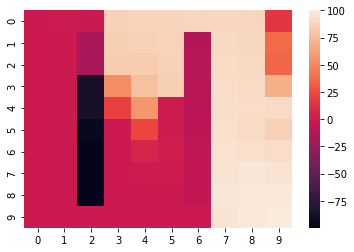

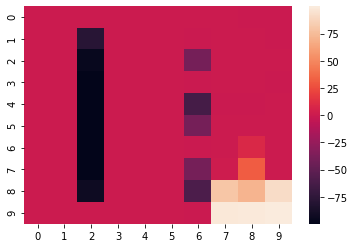

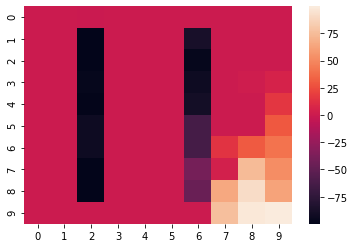

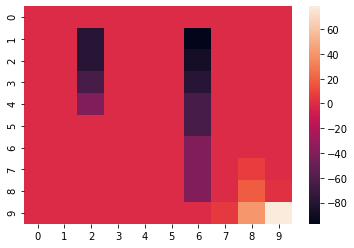

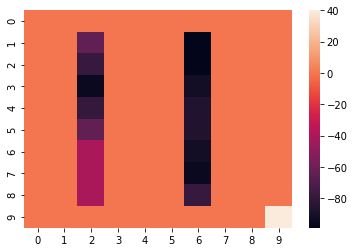

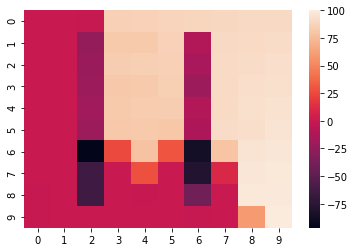

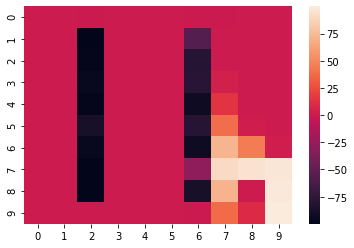

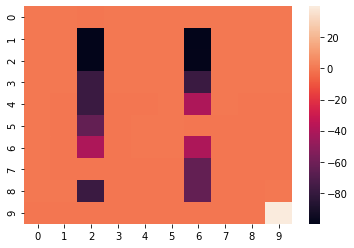

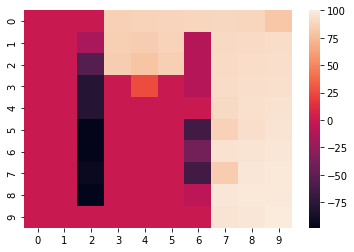

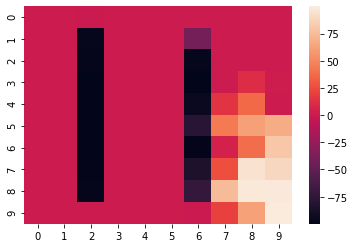

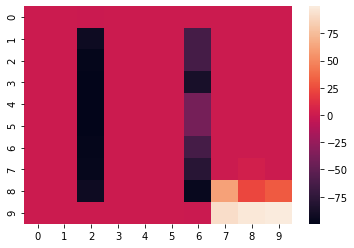

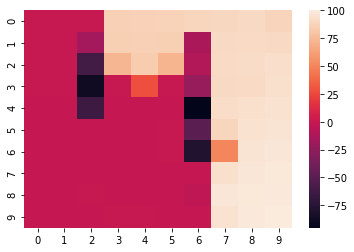

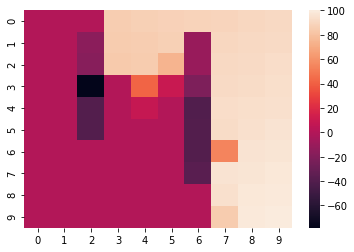

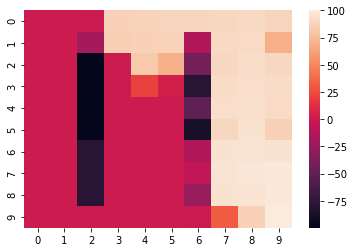

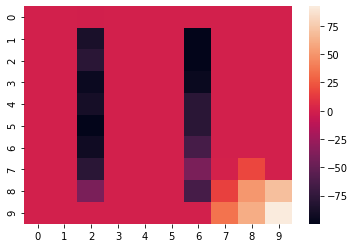

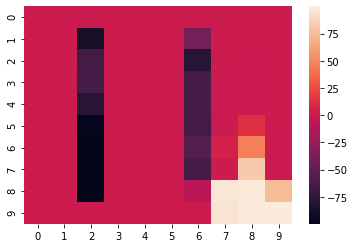

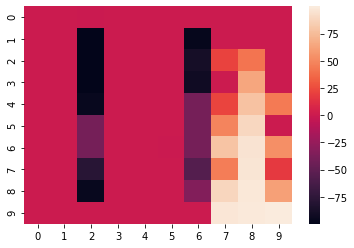

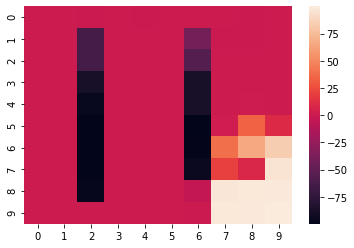

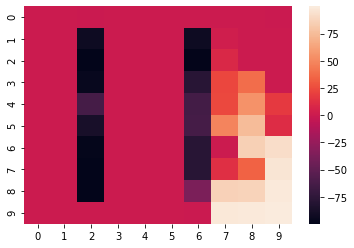

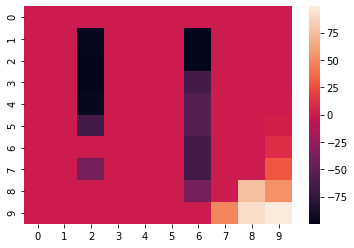

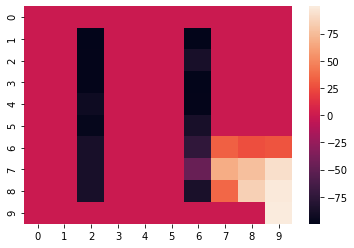

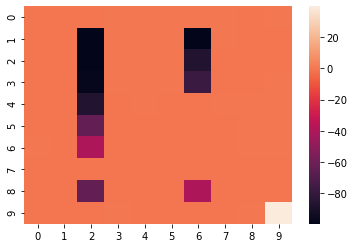

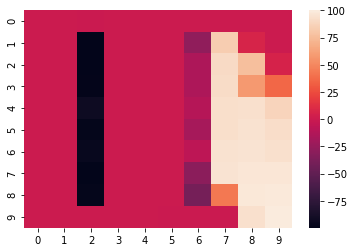

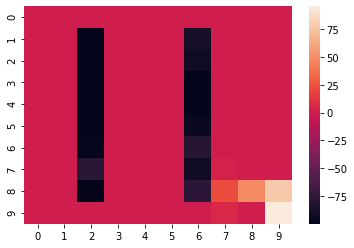

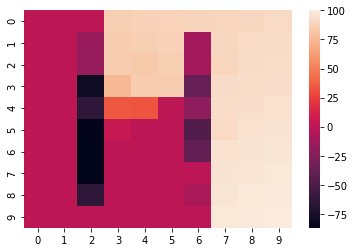

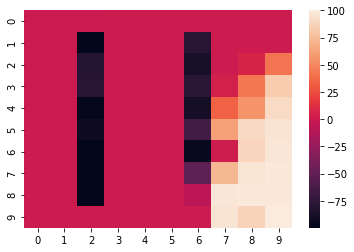

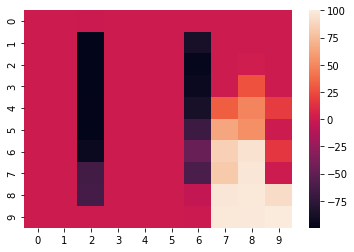

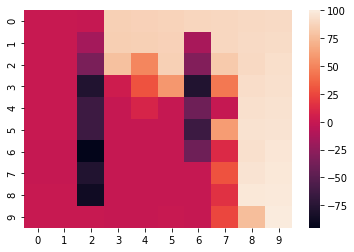

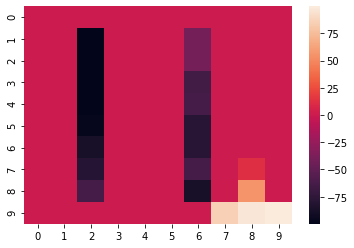

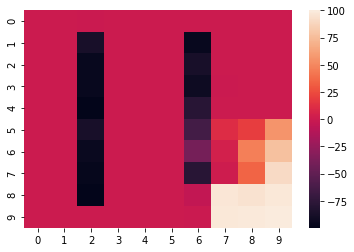

In [26]:
random.seed(seed)
search(30, 20000, [-.1,.1], 0.4, 0.99, 0.7)

Usando a implementação do exercício 6, mas com a matrix inicializada a 0 nota-se alguma melhoria.

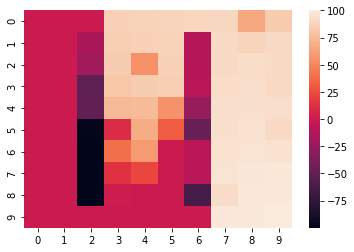

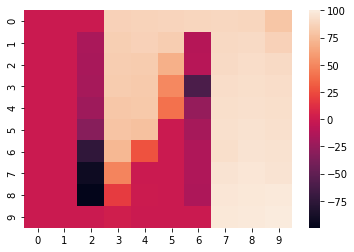

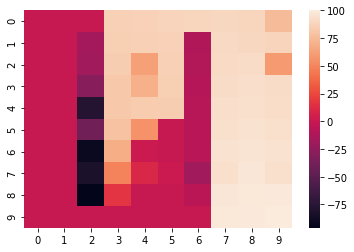

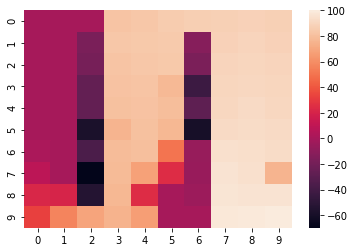

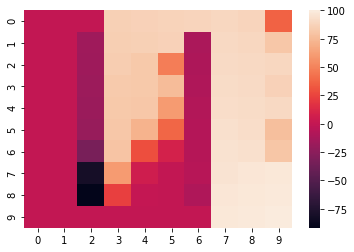

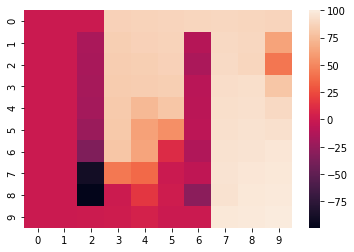

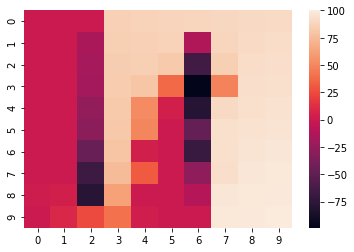

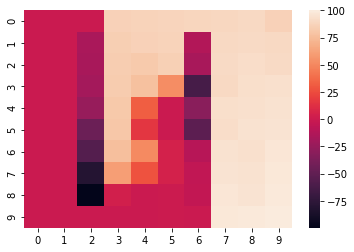

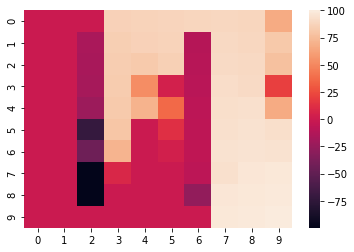

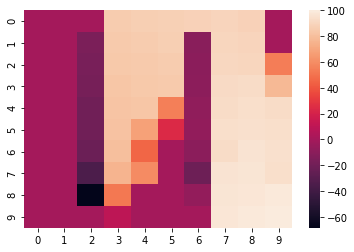

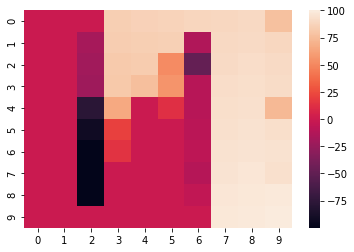

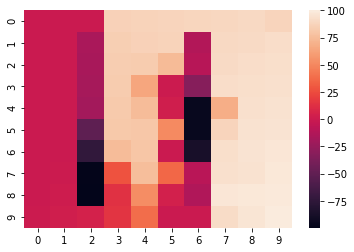

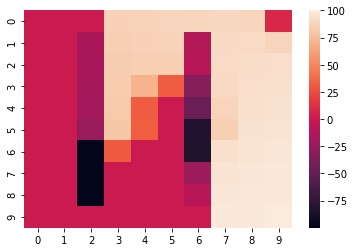

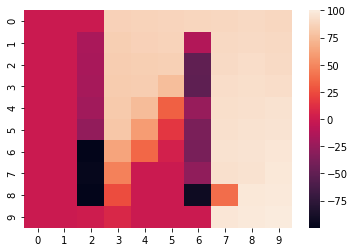

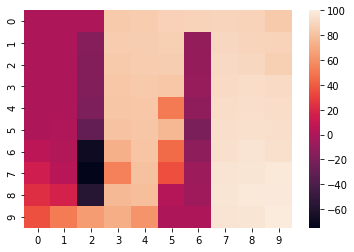

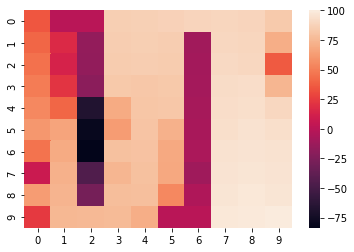

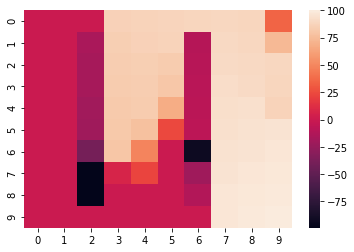

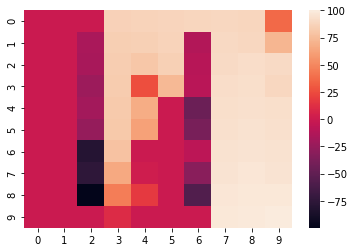

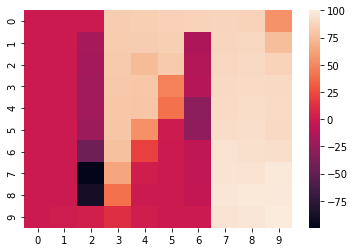

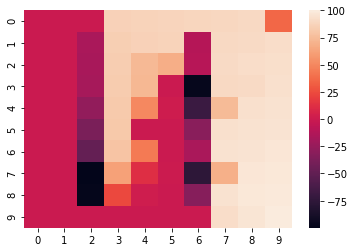

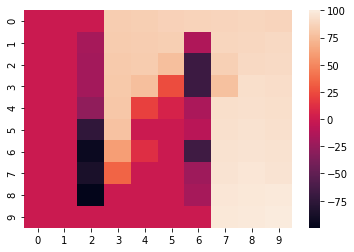

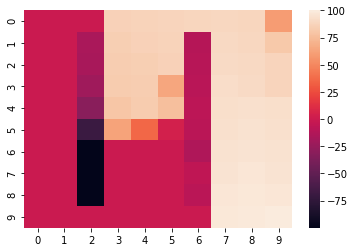

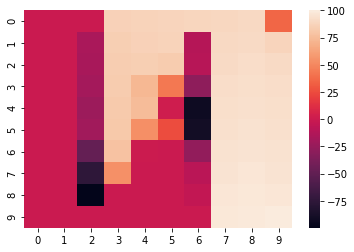

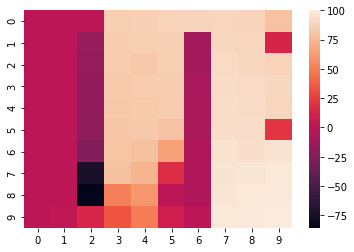

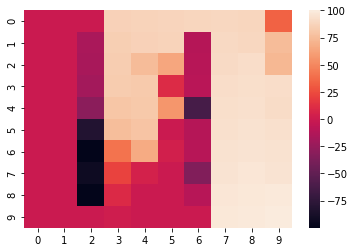

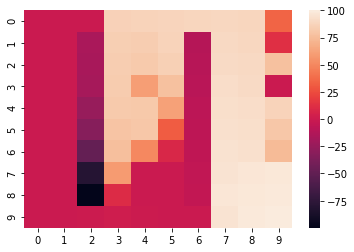

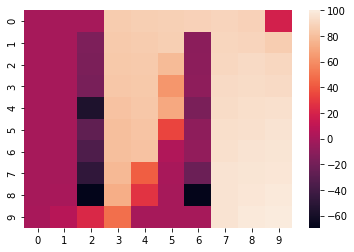

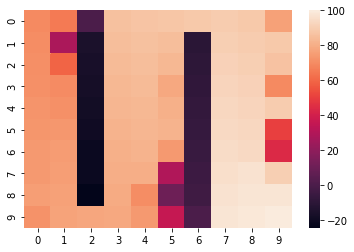

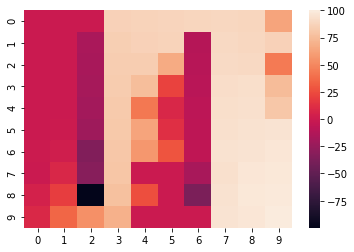

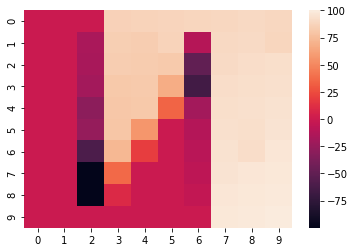

In [27]:
random.seed(seed)
search(30, 20000, [0, 0], 0.4, 0.99, 0.7)

Labirinto da figura 2

In [28]:
def reward(state):
    walls = [4,14,24,34,44,54,64,74,84,17,27,37,47,57,67,77,87,97]
    if state == 100:
        return 100
    elif state in walls:
        return -100
    else:
        return 0

O labirinto foi resolvido usando o código desenvolvido no exercício 4

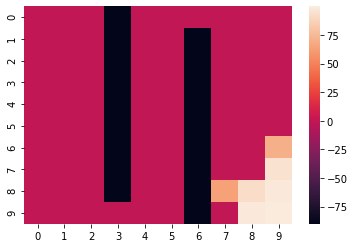

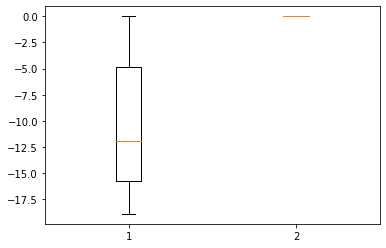

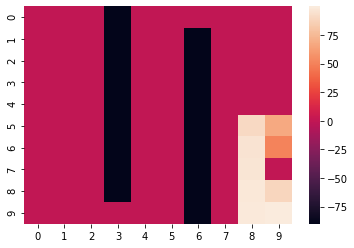

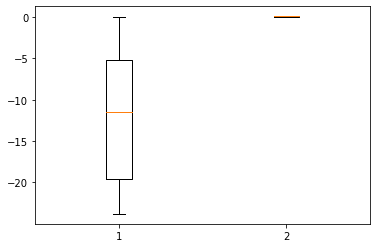

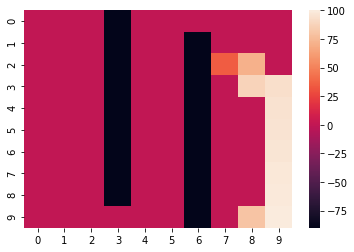

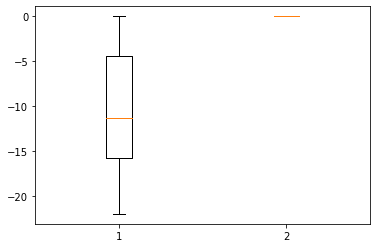

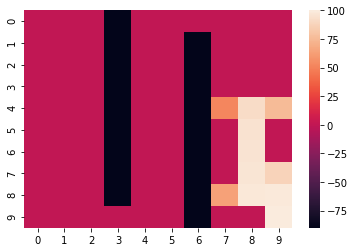

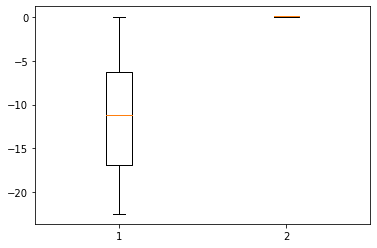

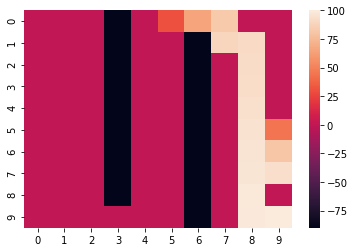

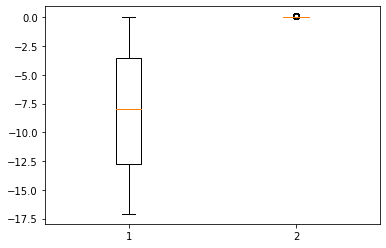

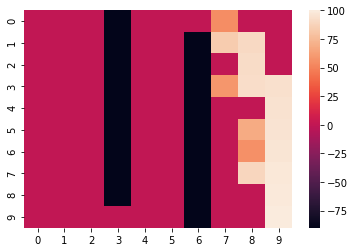

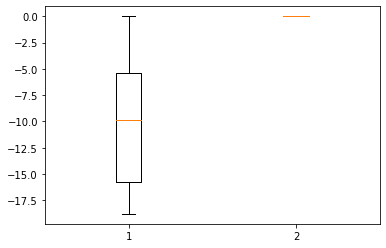

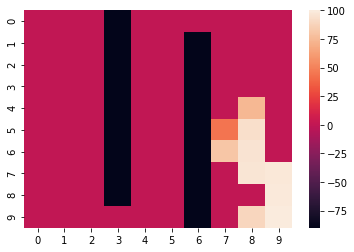

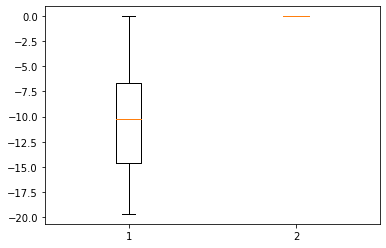

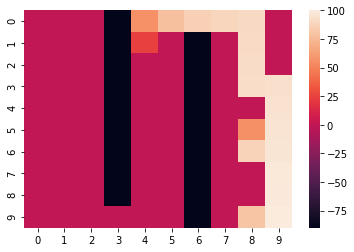

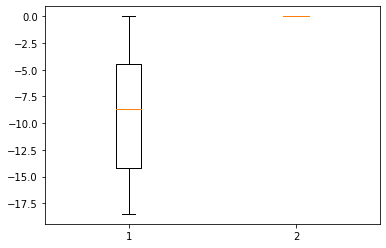

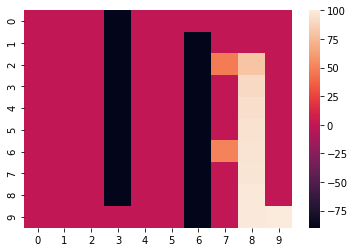

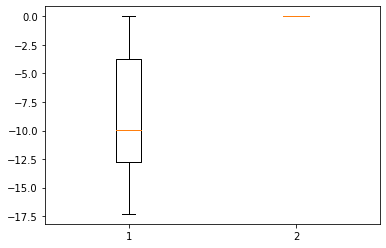

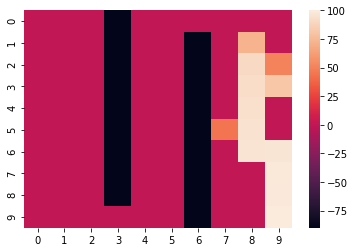

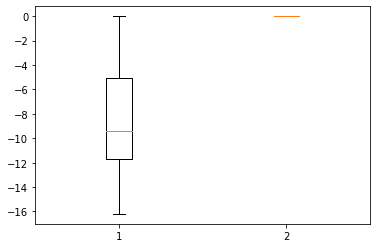

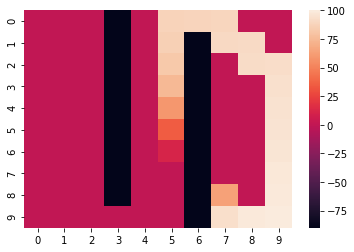

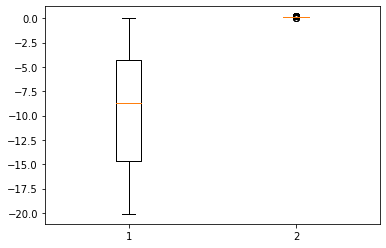

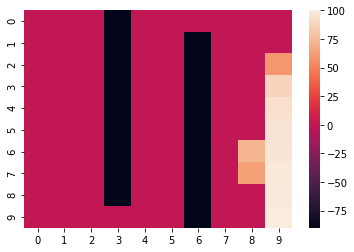

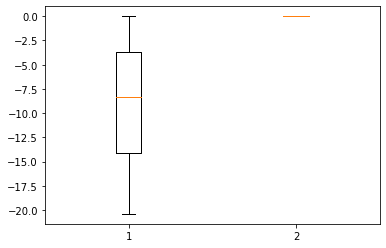

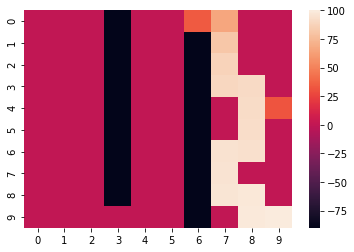

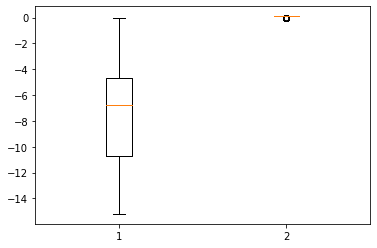

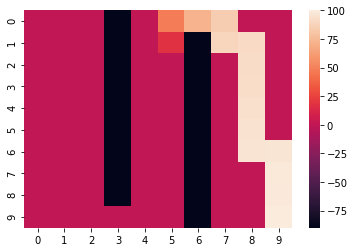

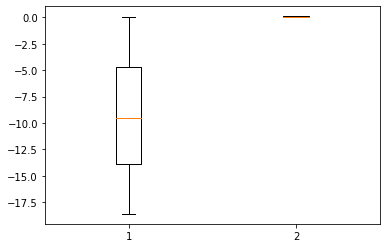

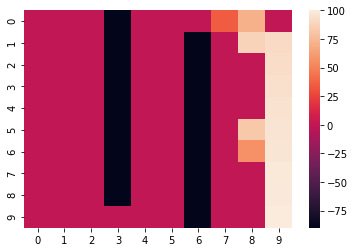

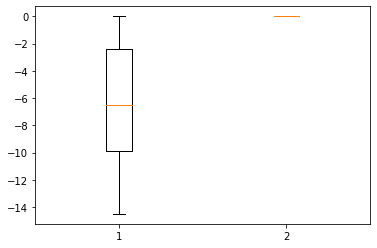

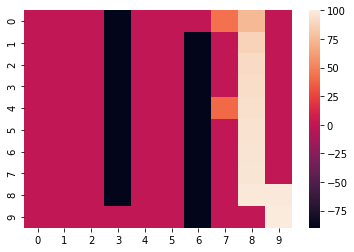

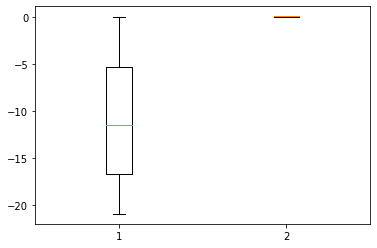

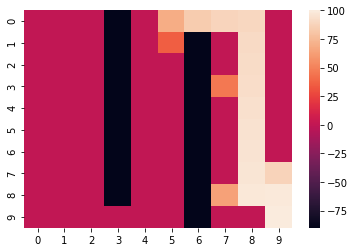

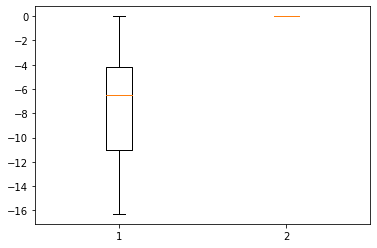

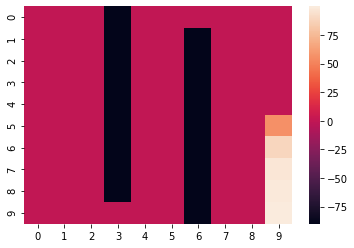

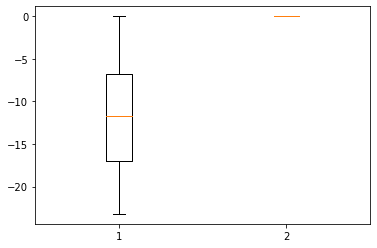

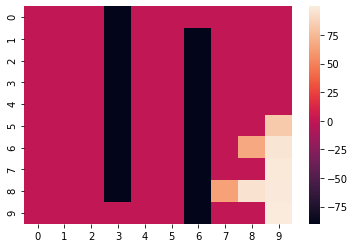

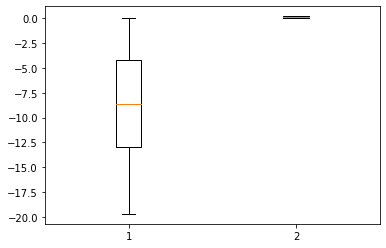

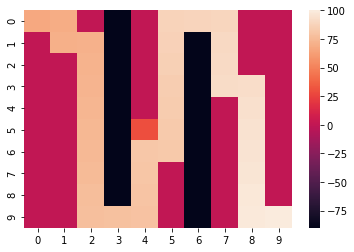

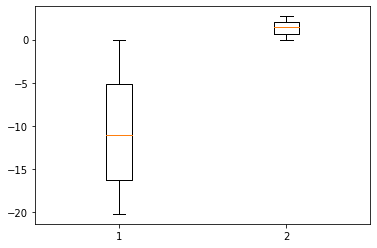

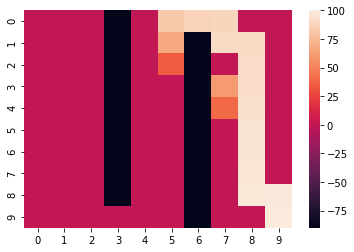

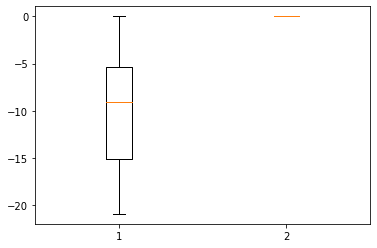

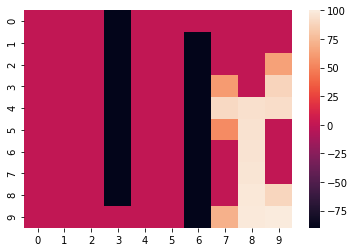

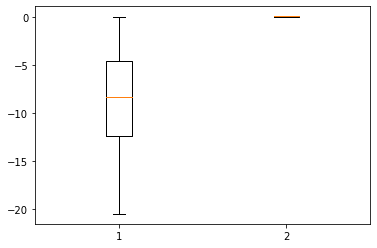

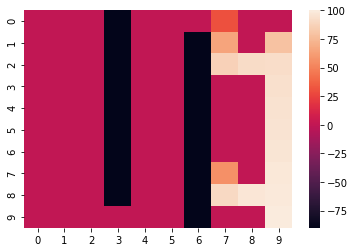

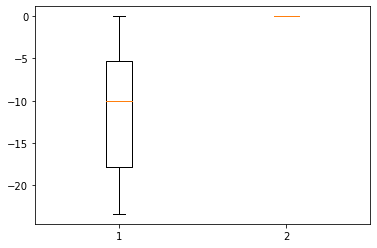

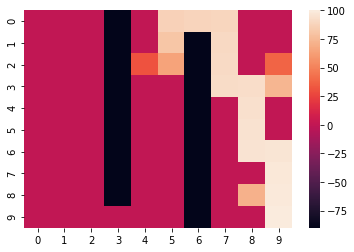

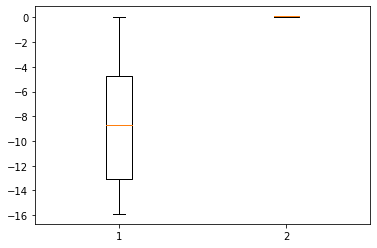

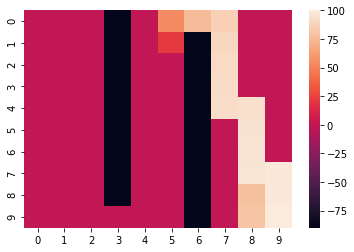

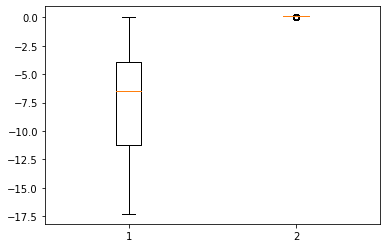

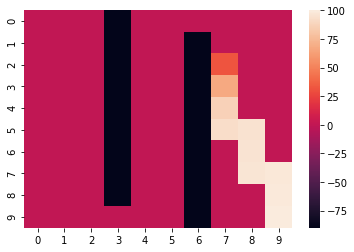

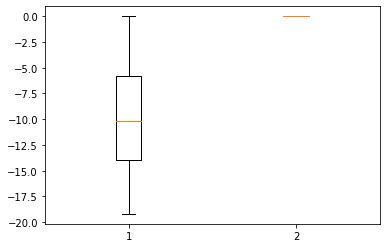

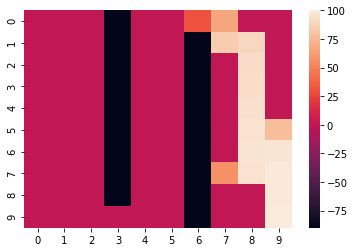

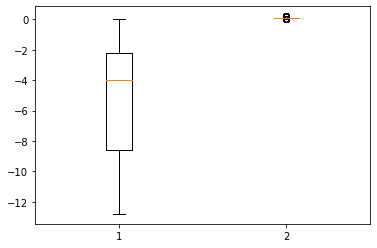

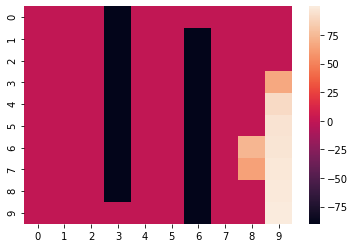

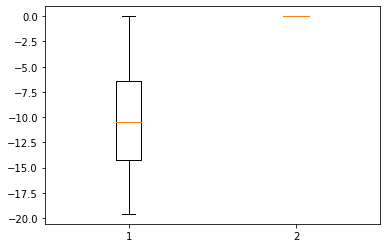

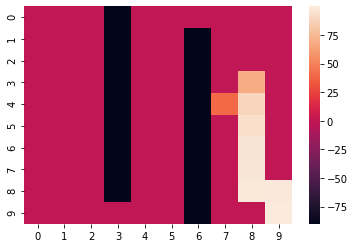

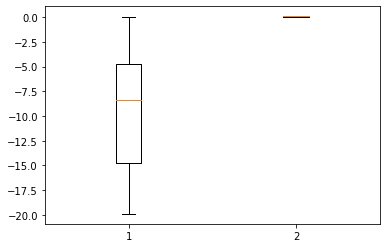

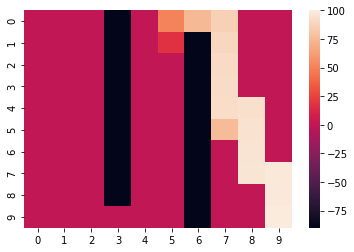

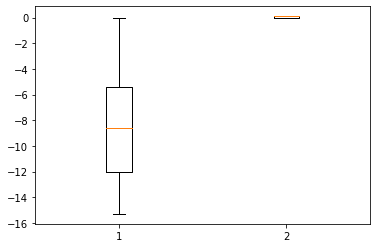

Average run-times: 0.06495912075042724 Standard deviation: 0.0008706809439457453


In [30]:
#Implementacao do exercicio 4
random.seed(seed)
search(30,20000, 0.9, 0.99)

Usando a implementação do exercício 6, alguns vezes o agente é capaz de descobrir o caminho mas são poucas

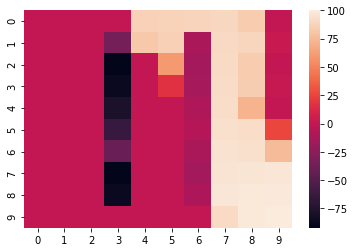

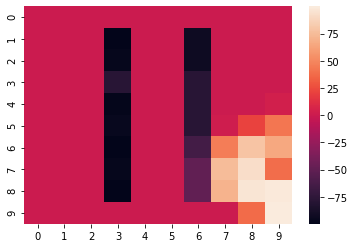

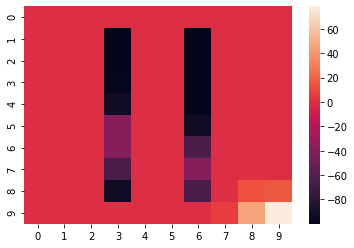

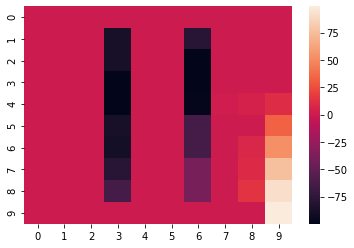

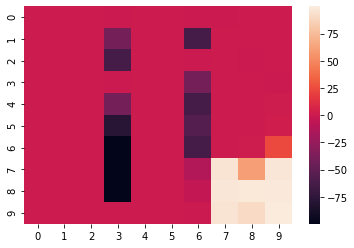

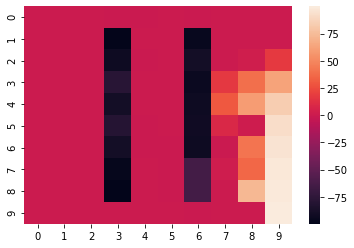

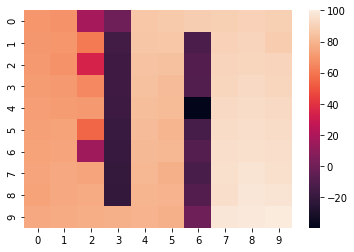

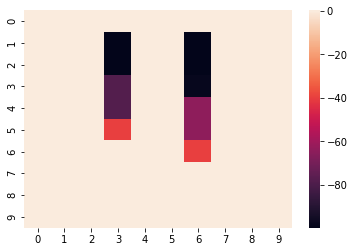

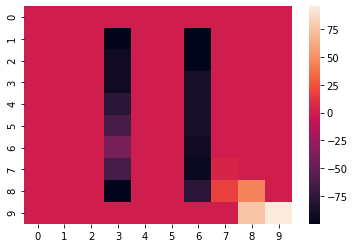

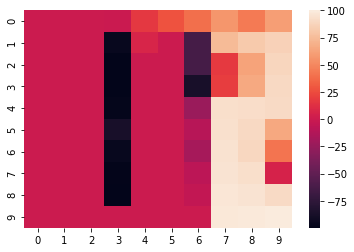

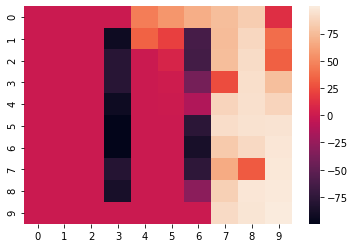

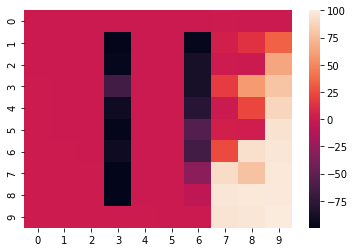

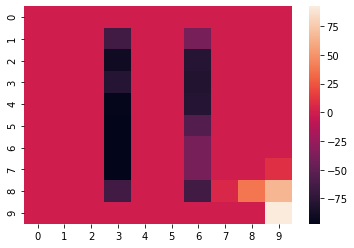

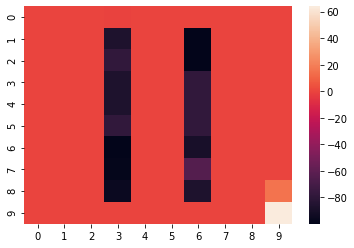

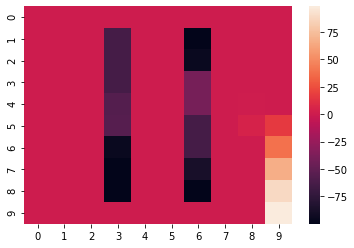

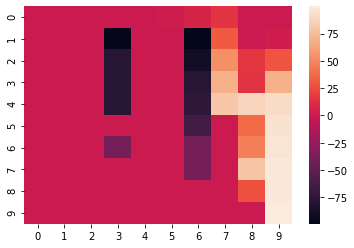

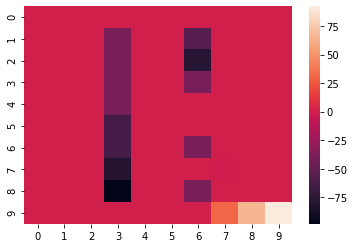

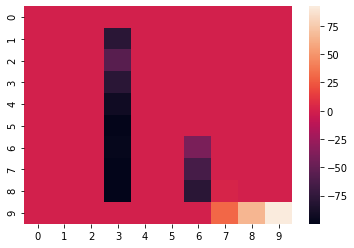

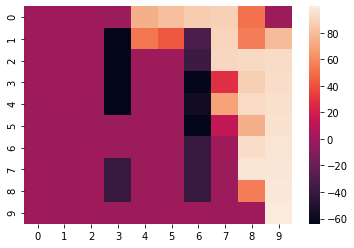

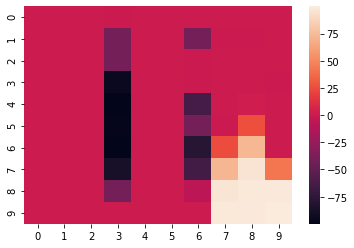

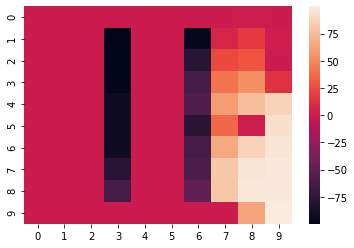

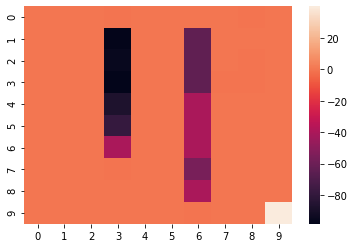

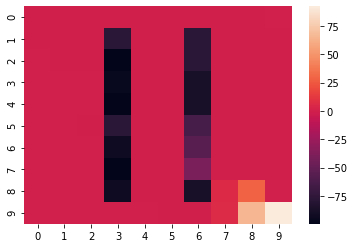

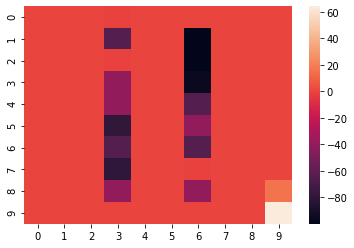

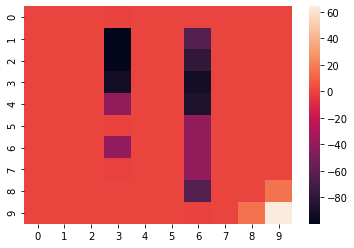

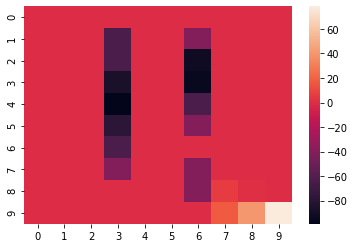

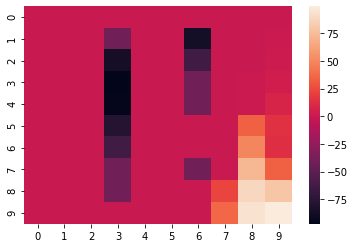

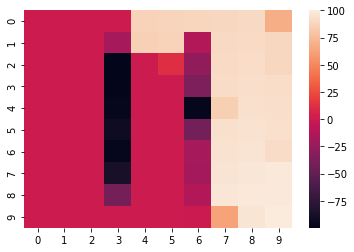

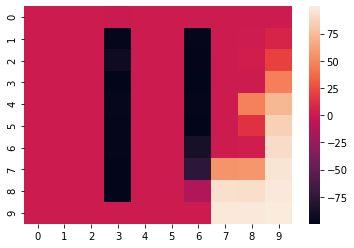

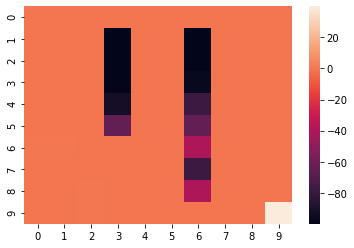

In [32]:
random.seed(seed)
search(30, 20000, [-.1,.1], 0.4, 0.99, 0.7)

Nota: Talvez exista algum erro na minha implementação do exercício 6 que eu não me tenha apercebido e que não permita a aprendizagem correta. Para este exercício acho que os penalty rewards deviam ser mais altos, semelhantes ou iguais ao reward para desencorajar o agente a simplesmente passar pela parede, visto que a punição é baixa.  Quando usamos o código implementado no exercício 4, vemos que o agente consegue resolver o labirinto sem atravessar a parede.

# Exercício 9

Podemos converter os float points para inteiros de modo a 10cm<sup>2</sup> corresponderem a um 'state'. Com a informação captada pelo agente, iríamos ter neste momento 6 estados possíveis, [0-10, 11-20, 21-30, 31-40, 41-50, 51-60]. Para descobrir o resto dos estados seria uma questão do agente se mover na vertical e na horizontal no caso de estar a detetar uma parede e não o fim do 'environment'. Como simplificação, esta transformação da distância float em int traz alguma imprecisão que pode ser crítica dependo do cenário.